In [1]:
# Load the autoreload extension
%load_ext autoreload

# Reload all modules (except those imported with %aimport) automatically
%autoreload 2


from GP_Copilot.copilot.langgraph_testing import *
import pandas as pd
import os
from langchain_core.documents import Document
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

USER_AGENT environment variable not set, consider setting it to identify your requests.


# Past (before 03/19/2025)

- create a function that is given a filepath
- this function will output a vector store? documents? tbd
- The purpose of this is to make the vector store able to load on the spot



In [2]:
import matplotlib.pyplot as plt

# Cost data from the table
models = ["GPT-4o (Open AI)", "Llama 3.2 90B Instruct", "Claude 3.5 Haiku"]
costs_per_50_questions = [1.1, 0.34, 0.6]  # Costs for 50 questions



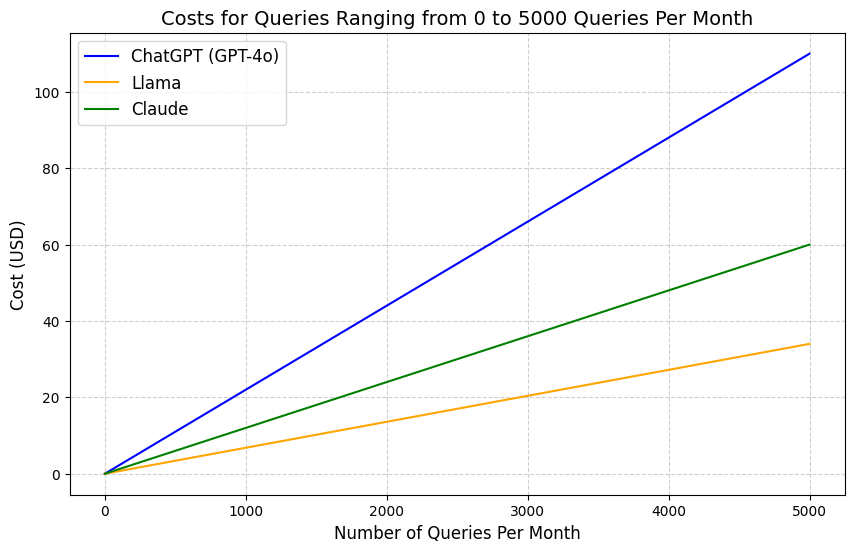

In [3]:
a = np.arange(0, 5000) * 1.1/50
b = np.arange(0, 5000) * 0.34/50
c = np.arange(0, 5000) * 0.6/50

import matplotlib.pyplot as plt

# Plot each array as a line
plt.figure(figsize=(10, 6))
plt.plot(a, label="ChatGPT (GPT-4o)", color="blue")
plt.plot(b, label="Llama", color="orange")
plt.plot(c, label="Claude", color="green")

# Add labels, title, and legend
plt.title("Costs for Queries Ranging from 0 to 5000 Queries Per Month", fontsize=14)
plt.xlabel("Number of Queries Per Month", fontsize=12)
plt.ylabel("Cost (USD)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.6, linestyle="--")

# Show the plot
plt.show()

In [6]:
df= pd.read_csv('/Users/edwinhuang/Documents/GitHub/github-scraper/data/2025-01-22_10-26-13/org_repositories.csv')

df.head()

,organization,name,full_name,stargazers_count,language,created_at,updated_at,homepage,fork,description
0,genepattern,genepattern-notebook,genepattern/genepattern-notebook,44,Python,2014-10-28T16:42:05Z,2024-08-06T21:09:55Z,http://genepattern-notebook.org,False,Platform for integrating genomic analysis with...
1,genepattern,BWA_module,genepattern/BWA_module,0,Perl,2015-03-24T20:54:37Z,2023-02-15T22:35:41Z,NaN,False,This is the repository for the GenePattern BWA...
2,genepattern,common_module_code,genepattern/common_module_code,0,NaN,2015-03-27T20:45:26Z,2025-01-15T18:03:51Z,NaN,False,This repository contains the shared code used ...
3,genepattern,ClsFileCreator,genepattern/ClsFileCreator,0,JavaScript,2015-03-30T15:42:27Z,2021-07-15T19:16:03Z,NaN,False,This a GenePattern Javascript visualizer that ...
4,genepattern,HierarchicalClustering,genepattern/HierarchicalClustering,1,Python,2015-04-01T12:55:43Z,2020-03-03T19:53:39Z,NaN,False,GenePattern Hierarchical Clustering module.


In [30]:
def download_files_across_org(module_names, output_dir, filename):
    """
    Download the module files (manifest, readme, etc... ) across all modules in the gp org to a directory
    filename --> filename to get, this will be the same for all modules. 
    """
    paths = [f'https://raw.githubusercontent.com/genepattern/{name}/develop/{filename}' for name in module_names]
    for name in module_names:
        github_url = f'https://raw.githubusercontent.com/genepattern/{name}/develop/{filename}'
        wget_command = f'wget -O {output_dir}/{name}.{filename} {github_url}'
        os.system(wget_command)

    

In [31]:
download_files_across_org(df.name, 'documentations/readmes', 'README.md')

--2025-01-22 13:41:12--  https://raw.githubusercontent.com/genepattern/genepattern-notebook/develop/README.md
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
404 Not Foundsent, awaiting response... 
2025-01-22 13:41:13 ERROR 404: Not Found.

--2025-01-22 13:41:13--  https://raw.githubusercontent.com/genepattern/BWA_module/develop/README.md
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
200 OKequest sent, awaiting response... 
Length: 317 [text/plain]
Saving to: 'documentations/readmes/BWA_module.README.md'

     0K                                                       100%  425K=0.001s

2025-01-22 13:41:13

In [14]:
## start inserting manifest file into vector store

## get retriever
retriever = LLM_langchain.get_retriever('GP_Copilot/chroma')


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Retriever found. Number of documents in collection: 1096


In [46]:
## format manifests
manifest_dir_fp = 'documentations/module_manifests'
readme_dir_fp = 'documentations/readmes'

In [22]:
f = open(os.path.join(manifest_dir_fp, os.listdir(manifest_dir_fp)[0]), 'r').read()

In [39]:
LLM_langchain.load_document('/Users/edwinhuang/Documents/GitHub/GPCopilot/documentations/readmes/ABSOLUTE.README.md')

[Document(metadata={}, page_content='# ABSOLUTE\nExtracts absolute copy numbers per cancer cell from a mixed DNA population. Use this module for the per-sample processing step in the workflow (usually after HAPSEG).')]

In [37]:
os.path.exists('/Users/edwinhuang/Documents/GitHub/GPCopilot/documentations/readmes/ABSOLUTE.README.md')

True

In [126]:
docs = []
for name in df.name:
    ## create metadata: manifest:
    metadata = {'module_name' : name,
               'file type' : 'manifest'}
    page_content = open(os.path.join(manifest_dir_fp, f'{name}.manifest')).read()
    docs.append(Document(metadata = metadata, page_content=page_content))


    ## create readme.md document

    metadata = {'module_name' : name, 'file type' : 'readme'}
    page_content = open(os.path.join(readme_dir_fp, f'{name}.README.md')).read()
    docs.append(Document(
        metadata = metadata,
        page_content = page_content
    ))

In [127]:
docs[-1]

Document(metadata={'module_name': 'tfsites.MapTfDNAInteractions', 'file type': 'readme'}, page_content='# tfsites.MapTfDNAInteractions\nThis is an example GenePattern module written in Python 3. It has its own module-specific Docker image, based on the GenePattern Python 3 image. This module specific image contains the source files for better reproducibility and portability. It can be used as a template for future modules.\n')

In [128]:
retriever.add_documents(docs)

['5f52574d-bbc9-4e8e-b2c2-8bf5b8367def',
 '13002095-71c9-4bc4-b85c-810ebeb768ed',
 'cd7976de-a59e-4df2-a289-406080fc83a5',
 '3a8d2e98-ee17-463f-b217-cd22f51e96cf',
 '604248f3-9b8d-40c0-ab70-68ca7dac1b81',
 'ba596806-c633-4ccd-a40d-4bb8741129b4',
 '251df5e1-2912-40f0-99d0-c00fb7c5df90',
 '5caf7647-8df9-43c5-afa8-74732a2e84c0',
 'fe1d01c9-bcef-410d-95d2-4c8a9c41a562',
 'd47ab6c7-caf4-4e4b-8b09-cdb065ed32d8',
 '27cf4b07-6c24-4ca9-afb0-069896639120',
 '2be5adcc-c010-4d5b-aeb7-b2a259ab43c7',
 'a73ddda9-0f0a-42d5-815b-01e63634c827',
 'a14e0cfd-a81d-4cf8-ac02-4dca0d55c859',
 '2588724c-59b4-40b3-adc5-a84f4fa60fc4',
 '53e8d75e-f8fb-4716-8b3d-740772aebd99',
 '7ac0d1d2-056b-4eab-b9cb-b2006c2e981b',
 'd1c0d135-84a3-4c36-852b-f9c52dff8510',
 'd77d3c18-35fc-4809-af26-cec473fe52d4',
 '530c8202-7d91-40f4-977e-b64f49c5c383',
 '1e7c820b-dcfa-4c86-8929-6bd7d7fc8156',
 'f8425b0f-e9a8-4a05-8111-be654b2e87e8',
 '2ce65647-e190-413e-b782-72dedcfdb15c',
 'b13f4eef-40e2-4b5e-b323-9d339894430a',
 '1ee77a8d-e357-

In [55]:
ret = retriever.as_retriever()

In [62]:
f = open('/Users/edwinhuang/Desktop/all.txt').read()

In [64]:
dct = json.loads(f)

In [66]:
len(dct['all_modules'])

236

In [67]:
dct['all_modules'][0]

{'lsid': 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00176:2',
 'name': 'AddFCSEventIndex',
 'description': 'Adds indexes to events in a Flow Cytometry Standard (FCS) data file.',
 'version': '2',
 'documentation': '/gp/getTaskDoc.jsp?name=urn%3Alsid%3Abroad.mit.edu%3Acancer.software.genepattern.module.analysis%3A00176%3A2',
 'categories': ['Flow Cytometry'],
 'suites': [],
 'tags': []}

In [122]:
retriever

In [105]:
!wget -O documentations/documentation_file/a.pdf https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00176:2



--2025-01-23 16:20:37--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00176:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/a.pdf'

documentations/docu     [ <=>                ]  55.18K  --.-KB/s    in 0.06s   

2025-01-23 16:20:38 (880 KB/s) - 'documentations/documentation_file/a.pdf' saved [56507]



In [123]:
errors = []
for module in dct['all_modules']:
    try:
        lsid = module['lsid']
        name = module['name']
        description = module['description']
        documentation_link = 'https://cloud.genepattern.org/gp/module/doc/' + lsid
        categories = "Categories: " + ', '.join(module['categories'])
        tags = module['tags']
    except Exception as e:
        print(f"{name} ran into this error: {e}")
        errors.append(name)

    !wget -O documentations/documentation_file/{name}.pdf {documentation_link}

    try:
        docs = LLM_langchain.load_document(f'documentations/documentation_file/{name}.pdf')
        for doc in docs:
            doc.metadata = {'lsid' : lsid, 
                           'module name' : name, 
                           'description' : description, 
                           'categories' : categories}
        print(len(docs))
    except Exception as e:
        print(f'{name} ran into an error while converting to langchain documents')
        errors.append(name)

    retriever.add_documents(docs)
        
        

--2025-01-23 16:58:49--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00176:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/AddFCSEventIndex.pdf'

documentations/docu     [ <=>                ]  55.18K  --.-KB/s    in 0.07s   

2025-01-23 16:58:49 (828 KB/s) - 'documentations/documentation_file/AddFCSEventIndex.pdf' saved [56507]

hi
2
--2025-01-23 16:58:50--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00198:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/AddFCSParameter.pdf'

documentations/docu     [ <=>                ]  62.77K  --.-KB/s    in 0.07s   

2025-01-23 16:58:51 (963 KB/s) - 'documentations/documentation_file/AddFCSParameter.pdf' saved [64274]

hi
3
--2025-01-23 16:58:51--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00179:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/AddNoiseToFCS.pdf'

documentations/docu     [ <=>                ]  65.33K  --.-KB/s    in 0.06s   

2025-01-23 16:58:52 (1022 KB/s) - 'documentations/documentation_file/AddNoiseToFCS.pdf' saved [66896]

hi
4
--2025-01-23 16:58:52--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00346:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/AffySTExpressionFileCreator/v2/ [following]
--2025-01-23 16:58:52--  https://genepattern.github.io/AffySTExpressionFileCreator/v2/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13446 (13K) [text/html]
Saving to: 'documentations/documentation_file/AffySTExpressionFileCreator.pdf'

documentations/docu 100%[===================>]  13.13K  --.-KB/s    in 0.003s  

2025-01-23 16:58:52 (4.85 MB/s) - 'documentations/documentation_file/AffySTExpressionFileCreator.pdf' saved [13446/13446]



invalid pdf header: b'<!DOC'


hi


EOF marker not found


AffySTExpressionFileCreator ran into an error while converting to langchain documents
--2025-01-23 16:58:53--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00378:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Amaretto.pdf'

documentations/docu     [ <=>                ]     268  --.-KB/s    in 0s      

2025-01-23 16:58:53 (36.5 MB/s) - 'documentations/documentation_file/Amaretto.pdf' saved [268]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
Amaretto ran into an error while converting to langchain documents
--2025-01-23 16:58:53--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00427:41
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/jluebeck/PrepareAA [following]
--2025-01-23 16:58:54--  https://github.com/jluebeck/PrepareAA
Resolving github.com (github.com)... 140.82.116.3
connected. to github.com (github.com)|140.82.116.3|:443... 
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/AmpliconSuite/AmpliconSuite-pipeline [following]
--2025-01-23 16:58:55--  https://github.com/AmpliconSuite/AmpliconSuite-pipeline
Reusing existing connection to github.com:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/AmpliconSuite.pdf'

documentations/docu     [               <=>  ] 431.66K  22.9KB/s    in 14s     

2025-01-23 16:59:09 (31.7 KB/s) - 'documentations/documentation_file/AmpliconSuite.pdf' saved [442020]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


AmpliconSuite ran into an error while converting to langchain documents
--2025-01-23 16:59:09--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00429:11
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/AmpliconSuiteAggregator/blob/develop/docs/v1/index.md [following]
--2025-01-23 16:59:10--  https://github.com/genepattern/AmpliconSuiteAggregator/blob/develop/docs/v1/index.md
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/AmpliconSuiteAggregator.pdf'

documentations/docu     [ <=>                ] 241.01K  --.-KB/s    in 0.1s    

2025-01-23 16:59:10 (1.69 MB/s) - 'documentations/documentation_file/AmpliconSuiteAggregator.pdf' saved [246796]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


AmpliconSuiteAggregator ran into an error while converting to langchain documents
--2025-01-23 16:59:11--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00090:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ARACNE.pdf'

documentations/docu     [ <=>                ]  53.16K  --.-KB/s    in 0.06s   

2025-01-23 16:59:11 (820 KB/s) - 'documentations/documentation_file/ARACNE.pdf' saved [54435]

hi
5
--2025-01-23 16:59:12--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00049:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/AreaChange.pdf'

documentations/docu     [ <=>                ]  26.97K  --.-KB/s    in 0s      

2025-01-23 16:59:12 (137 MB/s) - 'documentations/documentation_file/AreaChange.pdf' saved [27618]

hi
3
--2025-01-23 16:59:12--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00172:9
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/AuDIT.pdf'

documentations/docu     [ <=>                ]     268  --.-KB/s    in 0s      

2025-01-23 16:59:13 (85.2 MB/s) - 'documentations/documentation_file/AuDIT.pdf' saved [268]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
AuDIT ran into an error while converting to langchain documents
--2025-01-23 16:59:13--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00251:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/BedToGtf.pdf'

documentations/docu     [ <=>                ]  53.13K  --.-KB/s    in 0.06s   

2025-01-23 16:59:14 (851 KB/s) - 'documentations/documentation_file/BedToGtf.pdf' saved [54407]

hi
3
Beroukhim.Getz.2007.PNAS.Glioma.GISTIC ran into this error: 'description'
--2025-01-23 16:59:14--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00251:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Beroukhim.Getz.2007.PNAS.Glioma.GISTIC.pdf'

documentations/docu     [ <=>                ]  53.13K  --.-KB/s    in 0.07s   

2025-01-23 16:59:14 (790 KB/s) - 'documentations/documentation_file/Beroukhim.Getz.2007.PNAS.Glioma.GISTIC.pdf' saved [54407]

hi
3
--2025-01-23 16:59:15--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:1387:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No documentation for module: urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:1387:4;jsessionid=4D8A3DE28B96502DA28860D90576B3E9 [following]
--2025-01-23 16:59:15--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No%20documentation%20for%20module:%20urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:1387:4;jsessionid=4D8A3DE28B96502DA28860D90576B3E9
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 16:59:15--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Beroukhim.Getz.200

invalid pdf header: b'<!DOC'


hi


EOF marker not found


Beroukhim.Getz.2007.PNAS.Glioma.GISTIC2.0 ran into an error while converting to langchain documents
--2025-01-23 16:59:16--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00254:2.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/BWA.aln.pdf'

documentations/docu     [ <=>                ]     270  --.-KB/s    in 0s      

2025-01-23 16:59:16 (18.4 MB/s) - 'documentations/documentation_file/BWA.aln.pdf' saved [270]

hi

invalid pdf header: b'<!DOC'
EOF marker not found



BWA.aln ran into an error while converting to langchain documents
--2025-01-23 16:59:16--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00256:1.17
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/BWA.bwasw.pdf'

documentations/docu     [ <=>                ]     272  --.-KB/s    in 0s      

2025-01-23 16:59:18 (86.5 MB/s) - 'documentations/documentation_file/BWA.bwasw.pdf' saved [272]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
BWA.bwasw ran into an error while converting to langchain documents
--2025-01-23 16:59:18--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00253:1.10
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/BWA.indexer.pdf'

documentations/docu     [ <=>                ]     274  --.-KB/s    in 0s      

2025-01-23 16:59:18 (52.3 MB/s) - 'documentations/documentation_file/BWA.indexer.pdf' saved [274]



invalid pdf header: b'<!DOC'


hi


EOF marker not found


BWA.indexer ran into an error while converting to langchain documents
--2025-01-23 16:59:19--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00056:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/CART.pdf'

documentations/docu     [ <=>                ] 394.59K  1.97MB/s    in 0.2s    

2025-01-23 16:59:19 (1.97 MB/s) - 'documentations/documentation_file/CART.pdf' saved [404063]



Ignoring wrong pointing object 0 0 (offset 0)


hi
3
--2025-01-23 16:59:20--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00062:2.2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/CARTXValidation.pdf'

documentations/docu     [ <=>                ]     278  --.-KB/s    in 0s      

2025-01-23 16:59:20 (29.5 MB/s) - 'documentations/documentation_file/CARTXValidation.pdf' saved [278]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
CARTXValidation ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 16:59:20--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00405:5
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/CellFie.pdf'

documentations/docu     [ <=>                ]     305  --.-KB/s    in 0s      

2025-01-23 16:59:21 (36.4 MB/s) - 'documentations/documentation_file/CellFie.pdf' saved [305]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
CellFie ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 16:59:21--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00001:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ClassNeighbors.pdf'

documentations/docu     [ <=>                ]  85.05K  --.-KB/s    in 0.06s   

2025-01-23 16:59:21 (1.32 MB/s) - 'documentations/documentation_file/ClassNeighbors.pdf' saved [87096]

hi
8
--2025-01-23 16:59:22--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00261:4.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/ClsFileCreator.pdf'

documentations/docu     [ <=>                ]     282  --.-KB/s    in 0s      

2025-01-23 16:59:23 (44.8 MB/s) - 'documentations/documentation_file/ClsFileCreator.pdf' saved [282]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
ClsFileCreator ran into an error while converting to langchain documents
--2025-01-23 16:59:24--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broadinstitute.org:cancer.genome.analysis:00057:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/CNToXCN.pdf'

documentations/docu     [ <=>                ]  51.72K  --.-KB/s    in 0.06s   

2025-01-23 16:59:24 (805 KB/s) - 'documentations/documentation_file/CNToXCN.pdf' saved [52965]

hi
1
--2025-01-23 16:59:24--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00376:0.93
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/CoGAPS.pdf'

documentations/docu     [ <=>                ]     268  --.-KB/s    in 0s      

2025-01-23 16:59:25 (51.1 MB/s) - 'documentations/documentation_file/CoGAPS.pdf' saved [268]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
CoGAPS ran into an error while converting to langchain documents
--2025-01-23 16:59:25--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00134:2.2.0
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/CollapseDataset.pdf'

documentations/docu     [ <=>                ]     258  --.-KB/s    in 0s      

2025-01-23 16:59:25 (24.6 MB/s) - 'documentations/documentation_file/CollapseDataset.pdf' saved [258]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
CollapseDataset ran into an error while converting to langchain documents
--2025-01-23 16:59:25--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00127:3.6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server error: Can't read module documentation file: doc.html;jsessionid=3FAB526E3DCD16AC378A9747058E97CD [following]
--2025-01-23 16:59:26--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server%20error:%20Can't%20read%20module%20documentation%20file:%20doc.html;jsessionid=3FAB526E3DCD16AC378A9747058E97CD
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 16:59:26--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/ComBat.pdf'

documentations/docu     [ <=>                ]  25.22K  --.-KB/s    in 0s      

2025-01-23 16:59:26 (69.2 MB/s) - 'documen

invalid pdf header: b'<!DOC'


hi


EOF marker not found


ComBat ran into an error while converting to langchain documents
--2025-01-23 16:59:26--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00430:6.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/ComBat_Seq/blob/develop/README.md [following]
--2025-01-23 16:59:26--  https://github.com/genepattern/ComBat_Seq/blob/develop/README.md
Resolving github.com (github.com)... 140.82.116.3
connected. to github.com (github.com)|140.82.116.3|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/ComBat_Seq.pdf'

documentations/docu     [               <=>  ] 258.24K  62.2KB/s    in 4.2s    

2025-01-23 16:59:31 (62.2 KB/s) - 'documentations/documentation_file/ComBat_Seq.pdf' saved [264438]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


ComBat_Seq ran into an error while converting to langchain documents
--2025-01-23 16:59:31--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044:11
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/ComparativeMarkerSelection/v11/ [following]
--2025-01-23 16:59:32--  https://genepattern.github.io/ComparativeMarkerSelection/v11/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25420 (25K) [text/html]
Saving to: 'documentations/documentation_file/ComparativeMarkerSelection.pdf'

documentations/docu 100%[===================>]  24.82K  --.-KB/s    in 0.001s  

2025-01-23 16:59:32 (29.4 MB/s) - 'documentations/documentation_file/ComparativeMarkerSelection.pdf' saved [25420/25420]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
ComparativeMarkerSelection ran into an error while converting to langchain documents
--2025-01-23 16:59:32--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00052:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/CompareSpectra.pdf'

documentations/docu     [ <=>                ]  26.44K  --.-KB/s    in 0s      

2025-01-23 16:59:32 (88.7 MB/s) - 'documentations/documentation_file/CompareSpectra.pdf' saved [27071]

hi
1
--2025-01-23 16:59:33--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00283:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ConcatenateFilelist.pdf'

documentations/docu     [  <=>               ] 104.56K   379KB/s    in 0.3s    

2025-01-23 16:59:33 (379 KB/s) - 'documentations/documentation_file/ConcatenateFilelist.pdf' saved [107074]

hi
1
--2025-01-23 16:59:34--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00410:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/Conos.Cluster/blob/develop/docs/v3/index.md [following]
--2025-01-23 16:59:34--  https://github.com/genepattern/Conos.Cluster/blob/develop/docs/v3/index.md
Resolving github.com (github.com)... 140.82.116.3
connected. to github.com (github.com)|140.82.116.3|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Conos.Cluster.pdf'

documentations/docu     [   <=>              ] 243.73K   184KB/s    in 1.3s    

2025-01-23 16:59:36 (184 KB/s) - 'documentations/documentation_file/Conos.Cluster.pdf' saved [249581]



invalid pdf header: b'\n\n\n\n\n'
EOF marker not found


hi
Conos.Cluster ran into an error while converting to langchain documents
--2025-01-23 16:59:36--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00409:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/Conos.Preprocess/blob/develop/docs/v3/index.md [following]
--2025-01-23 16:59:36--  https://github.com/genepattern/Conos.Preprocess/blob/develop/docs/v3/index.md
Resolving github.com (github.com)... 140.82.116.3
connected. to github.com (github.com)|140.82.116.3|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Conos.Preprocess.pdf'

documentations/docu     [             <=>    ] 244.42K  86.8KB/s    in 2.8s    

2025-01-23 16:59:41 (86.8 KB/s) - 'documentations/documentation_file/Conos.Preprocess.pdf' saved [250281]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


Conos.Preprocess ran into an error while converting to langchain documents
--2025-01-23 16:59:41--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00423:8
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/Conos.VisualizeGeneExpression/blob/v5/documentation.md [following]
--2025-01-23 16:59:41--  https://github.com/genepattern/Conos.VisualizeGeneExpression/blob/v5/documentation.md
Resolving github.com (github.com)... 140.82.116.3
connected. to github.com (github.com)|140.82.116.3|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Conos.VisualizeGeneExpression.pdf'

documentations/docu     [   <=>              ] 257.91K   461KB/s    in 0.6s    

2025-01-23 16:59:42 (461 KB/s) - 'documentations/documentation_file/Conos.VisualizeGeneExpression.pdf' saved [264100]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


Conos.VisualizeGeneExpression ran into an error while converting to langchain documents
--2025-01-23 16:59:43--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00030:7.2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ConsensusClustering.pdf'

documentations/docu     [ <=>                ]  42.44K  --.-KB/s    in 0.06s   

2025-01-23 16:59:43 (683 KB/s) - 'documentations/documentation_file/ConsensusClustering.pdf' saved [43461]

hi
4
--2025-01-23 16:59:44--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:8080.gpbroad.broadinstitute.org:genepatternmodules:345:1.4.20
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/ConstellationMap.pdf'

documentations/docu     [ <=>                ]     249  --.-KB/s    in 0s      

2025-01-23 16:59:44 (47.5 MB/s) - 'documentations/documentation_file/ConstellationMap.pdf' saved [249]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
ConstellationMap ran into an error while converting to langchain documents
--2025-01-23 16:59:45--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00426:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/Convert.Alevin/v1/ [following]
--2025-01-23 16:59:45--  https://genepattern.github.io/Convert.Alevin/v1/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5516 (5.4K) [text/html]
Saving to: 'documentations/documentation_file/Convert.Alevin.pdf'

documentations/docu 100%[===================>]   5.39K  --.-KB/s    in 0s      

2025-01-23 16:59:45 (12.6 MB/s) - 'documentations/documentation_file/Convert.Alevin.pdf' saved [5516/5516]



invalid pdf header: b'<!DOC'


hi


EOF marker not found


Convert.Alevin ran into an error while converting to langchain documents
--2025-01-23 16:59:45--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00002:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ConvertLineEndings.pdf'

documentations/docu     [ <=>                ]  23.33K  --.-KB/s    in 0s      

2025-01-23 16:59:46 (123 MB/s) - 'documentations/documentation_file/ConvertLineEndings.pdf' saved [23895]

hi
1
--2025-01-23 16:59:46--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00038:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ConvertToMAGEML.pdf'

documentations/docu     [  <=>               ] 669.93K  2.49MB/s    in 0.3s    

2025-01-23 16:59:47 (2.49 MB/s) - 'documentations/documentation_file/ConvertToMAGEML.pdf' saved [686006]

hi
3
--2025-01-23 16:59:47--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00188:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ConvertToMAGETAB.pdf'

documentations/docu     [ <=>                ] 104.45K  --.-KB/s    in 0.1s    

2025-01-23 16:59:48 (851 KB/s) - 'documentations/documentation_file/ConvertToMAGETAB.pdf' saved [106956]

hi
3
--2025-01-23 16:59:48--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00085:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/CopyNumberDivideByNormals.pdf'

documentations/docu     [ <=>                ]  30.79K  --.-KB/s    in 0s      

2025-01-23 16:59:48 (118 MB/s) - 'documentations/documentation_file/CopyNumberDivideByNormals.pdf' saved [31531]

hi
3
--2025-01-23 16:59:49--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00164:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server error: Can't read module documentation file: doc.html;jsessionid=E774280860721419852147987CA54EFB [following]
--2025-01-23 16:59:49--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server%20error:%20Can't%20read%20module%20documentation%20file:%20doc.html;jsessionid=E774280860721419852147987CA54EFB
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 16:59:49--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/CoxRegression.pdf'

documentations/docu     [ <=>                ]  25.22K  --.-KB/s    in 0s      

2025-01-23 16:59:49 (95.1 MB/s) - '

invalid pdf header: b'<!DOC'


hi


EOF marker not found


CoxRegression ran into an error while converting to langchain documents
--2025-01-23 16:59:49--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00343:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/CreateSymlinks.pdf'

documentations/docu     [ <=>                ]     277  --.-KB/s    in 0s      

2025-01-23 16:59:50 (37.7 MB/s) - 'documentations/documentation_file/CreateSymlinks.pdf' saved [277]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
CreateSymlinks ran into an error while converting to langchain documents
--2025-01-23 16:59:50--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00174:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/CsvToFcs.pdf'

documentations/docu     [ <=>                ]  64.78K  --.-KB/s    in 0.06s   

2025-01-23 16:59:51 (1004 KB/s) - 'documentations/documentation_file/CsvToFcs.pdf' saved [66332]

hi
5
--2025-01-23 16:59:51--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00335:0.21
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/CummeRbund.GeneSetReport.pdf'

documentations/docu     [ <=>                ]     287  --.-KB/s    in 0s      

2025-01-23 16:59:51 (17.1 MB/s) - 'documentations/documentation_file/CummeRbund.GeneSetReport.pdf' saved [287]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
CummeRbund.GeneSetReport ran into an error while converting to langchain documents
--2025-01-23 16:59:52--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00326:0.30
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/CummeRbund.QcReport.pdf'

documentations/docu     [ <=>                ]     282  --.-KB/s    in 0s      

2025-01-23 16:59:52 (53.8 MB/s) - 'documentations/documentation_file/CummeRbund.QcReport.pdf' saved [282]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
CummeRbund.QcReport ran into an error while converting to langchain documents
--2025-01-23 16:59:53--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00342:0.11
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/CummeRbund.SelectedConditionsReport.pdf'

documentations/docu     [ <=>                ]     298  --.-KB/s    in 0s      

2025-01-23 16:59:53 (56.8 MB/s) - 'documentations/documentation_file/CummeRbund.SelectedConditionsReport.pdf' saved [298]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
CummeRbund.SelectedConditionsReport ran into an error while converting to langchain documents
--2025-01-23 16:59:53--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00336:0.17
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/CummeRbund.SelectedGeneReport.pdf'

documentations/docu     [ <=>                ]     292  --.-KB/s    in 0s      

2025-01-23 16:59:54 (55.7 MB/s) - 'documentations/documentation_file/CummeRbund.SelectedGeneReport.pdf' saved [292]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
CummeRbund.SelectedGeneReport ran into an error while converting to langchain documents
--2025-01-23 16:59:54--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00097:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: 'documentations/documentation_file/CytoscapeViewer.pdf'

documentations/docu     [ <=>                ]   2.63K  --.-KB/s    in 0s      

2025-01-23 16:59:54 (286 MB/s) - 'documentations/documentation_file/CytoscapeViewer.pdf' saved [2698]



invalid pdf header: b'/*\n *'
EOF marker not found
EOF marker not found


hi
CytoscapeViewer ran into an error while converting to langchain documents
--2025-01-23 16:59:55--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:8080.gpbroad.broadinstitute.org:genepatternmodules:479:0.19
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/DAPPLE.pdf'

documentations/docu     [ <=>                ] 125.11K  --.-KB/s    in 0.1s    

2025-01-23 16:59:55 (998 KB/s) - 'documentations/documentation_file/DAPPLE.pdf' saved [128111]

hi
8
--2025-01-23 16:59:56--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00268:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/DeIdentifyFCS.pdf'

documentations/docu     [ <=>                ] 219.82K  1.15MB/s    in 0.2s    

2025-01-23 16:59:56 (1.15 MB/s) - 'documentations/documentation_file/DeIdentifyFCS.pdf' saved [225091]

hi
4
--2025-01-23 16:59:57--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00362:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/DESeq2.pdf'

documentations/docu     [ <=>                ]     240  --.-KB/s    in 0s      

2025-01-23 16:59:57 (32.7 MB/s) - 'documentations/documentation_file/DESeq2.pdf' saved [240]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
DESeq2 ran into an error while converting to langchain documents
--2025-01-23 16:59:58--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00045:10
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/DifferentialExpressionViewer/blob/v10/docs/v10/index.md [following]
--2025-01-23 16:59:58--  https://github.com/genepattern/DifferentialExpressionViewer/blob/v10/docs/v10/index.md
Resolving github.com (github.com)... 140.82.116.4
connected. to github.com (github.com)|140.82.116.4|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/DifferentialExpressionViewer.pdf'

documentations/docu     [            <=>     ] 282.43K   106KB/s    in 2.7s    

2025-01-23 17:00:01 (106 KB/s) - 'documentations/documentation_file/DifferentialExpressionViewer.pdf' saved [289210]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


DifferentialExpressionViewer ran into an error while converting to langchain documents
--2025-01-23 17:00:01--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00393:1.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/DiSCoVER.pdf'

documentations/docu     [ <=>                ]     268  --.-KB/s    in 0s      

2025-01-23 17:00:02 (21.3 MB/s) - 'documentations/documentation_file/DiSCoVER.pdf' saved [268]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
DiSCoVER ran into an error while converting to langchain documents
--2025-01-23 17:00:02--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00034:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/DownloadURL.pdf'

documentations/docu     [  <=>               ] 353.32K  1.65MB/s    in 0.2s    

2025-01-23 17:00:03 (1.65 MB/s) - 'documentations/documentation_file/DownloadURL.pdf' saved [361796]

hi
1
--2025-01-23 17:00:03--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:1394:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/Harmony/blob/develop/README.md [following]
--2025-01-23 17:00:03--  https://github.com/genepattern/Harmony/blob/develop/README.md
Resolving github.com (github.com)... 140.82.116.4
connected. to github.com (github.com)|140.82.116.4|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/edwinharm.pdf'

documentations/docu     [ <=>                ] 262.96K  --.-KB/s    in 0.1s    

2025-01-23 17:00:04 (1.87 MB/s) - 'documentations/documentation_file/edwinharm.pdf' saved [269267]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


edwinharm ran into an error while converting to langchain documents
--2025-01-23 17:00:04--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00158:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No documentation for module: urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00158:4;jsessionid=D35A59C6E9D8C2A55BC3E04E9FF369F9 [following]
--2025-01-23 17:00:05--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No%20documentation%20for%20module:%20urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00158:4;jsessionid=D35A59C6E9D8C2A55BC3E04E9FF369F9
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:00:05--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/ESPPredictor.pdf'

documentations/docu     [ 

invalid pdf header: b'<!DOC'


hi


EOF marker not found


ESPPredictor ran into an error while converting to langchain documents
--2025-01-23 17:00:05--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00041:12.5
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/ExpressionFileCreator.pdf'

documentations/docu     [ <=>                ]     285  --.-KB/s    in 0s      

2025-01-23 17:00:05 (45.3 MB/s) - 'documentations/documentation_file/ExpressionFileCreator.pdf' saved [285]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
ExpressionFileCreator ran into an error while converting to langchain documents
--2025-01-23 17:00:05--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00248:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ExprToGct.pdf'

documentations/docu     [ <=>                ]  57.93K  --.-KB/s    in 0.07s   

2025-01-23 17:00:06 (890 KB/s) - 'documentations/documentation_file/ExprToGct.pdf' saved [59322]

hi
2
--2025-01-23 17:00:06--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00003:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ExtractColumnNames.pdf'

documentations/docu     [ <=>                ]  32.19K  --.-KB/s    in 0s      

2025-01-23 17:00:07 (146 MB/s) - 'documentations/documentation_file/ExtractColumnNames.pdf' saved [32963]

hi
1
--2025-01-23 17:00:07--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00046:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ExtractComparativeMarkerResults.pdf'

documentations/docu     [ <=>                ]  80.07K  --.-KB/s    in 0.06s   

2025-01-23 17:00:07 (1.24 MB/s) - 'documentations/documentation_file/ExtractComparativeMarkerResults.pdf' saved [81987]

hi
3
--2025-01-23 17:00:08--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00182:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ExtractFCSDataset.pdf'

documentations/docu     [ <=>                ] 133.85K  --.-KB/s    in 0.1s    

2025-01-23 17:00:08 (1.02 MB/s) - 'documentations/documentation_file/ExtractFCSDataset.pdf' saved [137061]

hi
3
--2025-01-23 17:00:08--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00181:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ExtractFCSKeywords.pdf'

documentations/docu     [ <=>                ]  63.74K  --.-KB/s    in 0.06s   

2025-01-23 17:00:09 (1014 KB/s) - 'documentations/documentation_file/ExtractFCSKeywords.pdf' saved [65266]

hi
3
--2025-01-23 17:00:09--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00180:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ExtractFCSParameters.pdf'

documentations/docu     [ <=>                ]  61.66K  --.-KB/s    in 0.06s   

2025-01-23 17:00:10 (957 KB/s) - 'documentations/documentation_file/ExtractFCSParameters.pdf' saved [63143]

hi
3
--2025-01-23 17:00:10--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00004:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ExtractRowNames.pdf'

documentations/docu     [ <=>                ] 349.29K  1.73MB/s    in 0.2s    

2025-01-23 17:00:11 (1.73 MB/s) - 'documentations/documentation_file/ExtractRowNames.pdf' saved [357670]



Ignoring wrong pointing object 0 0 (offset 0)


hi
1
--2025-01-23 17:00:11--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00340:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/FastQC.pdf'

documentations/docu     [ <=>                ]     274  --.-KB/s    in 0s      

2025-01-23 17:00:11 (43.6 MB/s) - 'documentations/documentation_file/FastQC.pdf' saved [274]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
FastQC ran into an error while converting to langchain documents
--2025-01-23 17:00:11--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00175:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/FcsToCsv.pdf'

documentations/docu     [ <=>                ]  68.40K  --.-KB/s    in 0.07s   

2025-01-23 17:00:12 (1018 KB/s) - 'documentations/documentation_file/FcsToCsv.pdf' saved [70044]

hi
4
--2025-01-23 17:00:12--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00005:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/FeatureSummaryViewer.pdf'

documentations/docu     [ <=>                ]  21.82K  --.-KB/s    in 0s      

2025-01-23 17:00:12 (74.2 MB/s) - 'documentations/documentation_file/FeatureSummaryViewer.pdf' saved [22343]

hi
2
--2025-01-23 17:00:13--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00274:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/FileSplitter.pdf'

documentations/docu     [ <=>                ] 113.74K  --.-KB/s    in 0.1s    

2025-01-23 17:00:13 (883 KB/s) - 'documentations/documentation_file/FileSplitter.pdf' saved [116465]

hi
2
--2025-01-23 17:00:14--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00280:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/FilterFilelist.pdf'

documentations/docu     [ <=>                ] 105.37K  --.-KB/s    in 0.1s    

2025-01-23 17:00:14 (800 KB/s) - 'documentations/documentation_file/FilterFilelist.pdf' saved [107902]

hi
2
--2025-01-23 17:00:14--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00159:4.2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/FLAMEPreprocess.pdf'

documentations/docu     [  <=>               ] 577.39K  2.14MB/s    in 0.3s    

2025-01-23 17:00:15 (2.14 MB/s) - 'documentations/documentation_file/FLAMEPreprocess.pdf' saved [591247]



Ignoring wrong pointing object 0 0 (offset 0)


hi
5
--2025-01-23 17:00:16--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00250:5
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Fpkm_trackingToGct.pdf'

documentations/docu     [ <=>                ] 129.93K  --.-KB/s    in 0.1s    

2025-01-23 17:00:16 (968 KB/s) - 'documentations/documentation_file/Fpkm_trackingToGct.pdf' saved [133047]

hi
4
--2025-01-23 17:00:17--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00152:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/GctToPcl.pdf'

documentations/docu     [ <=>                ] 217.49K  1.10MB/s    in 0.2s    

2025-01-23 17:00:18 (1.10 MB/s) - 'documentations/documentation_file/GctToPcl.pdf' saved [222705]

hi
1
--2025-01-23 17:00:18--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00006:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/GeneListSignificanceViewer.pdf'

documentations/docu     [ <=>                ]  36.79K  --.-KB/s    in 0s      

2025-01-23 17:00:18 (186 MB/s) - 'documentations/documentation_file/GeneListSignificanceViewer.pdf' saved [37669]

hi
2
--2025-01-23 17:00:19--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00007:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/GeneNeighbors.pdf'

documentations/docu     [ <=>                ] 189.69K  --.-KB/s    in 0.1s    

2025-01-23 17:00:19 (1.40 MB/s) - 'documentations/documentation_file/GeneNeighbors.pdf' saved [194240]

hi
4
--2025-01-23 17:00:20--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042:6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/GEOImporter.pdf'

documentations/docu     [ <=>                ] 110.36K  --.-KB/s    in 0.1s    

2025-01-23 17:00:20 (841 KB/s) - 'documentations/documentation_file/GEOImporter.pdf' saved [113010]

hi
1
--2025-01-23 17:00:20--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00125:6.15.30
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/GISTIC_2.0.pdf'

documentations/docu     [ <=>                ]     404  --.-KB/s    in 0s      

2025-01-23 17:00:21 (77.1 MB/s) - 'documentations/documentation_file/GISTIC_2.0.pdf' saved [404]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
GISTIC_2.0 ran into an error while converting to langchain documents
--2025-01-23 17:00:21--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00008:0
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/GlobalAlignment.pdf'

documentations/docu     [ <=>                ]  35.40K  --.-KB/s    in 0s      

2025-01-23 17:00:21 (139 MB/s) - 'documentations/documentation_file/GlobalAlignment.pdf' saved [36245]

hi
4
--2025-01-23 17:00:22--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.pipeline:00001:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server error: Can't read module documentation file: Golub.Slonim.1999.Nature.all.aml.pdf;jsessionid=C6846539F70E1F4B73075F3B69813351 [following]
--2025-01-23 17:00:22--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server%20error:%20Can't%20read%20module%20documentation%20file:%20Golub.Slonim.1999.Nature.all.aml.pdf;jsessionid=C6846539F70E1F4B73075F3B69813351
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:00:22--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Golub.Slonim.1999.Nature.all.aml.pipeline.pdf'

documentations/docu     [ <=>   

invalid pdf header: b'<!DOC'


hi


EOF marker not found


Golub.Slonim.1999.Nature.all.aml.pipeline ran into an error while converting to langchain documents
--2025-01-23 17:00:23--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00072:20.4.0
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/GSEA.pdf'

documentations/docu     [ <=>                ]     248  --.-KB/s    in 0s      

2025-01-23 17:00:23 (26.3 MB/s) - 'documentations/documentation_file/GSEA.pdf' saved [248]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
GSEA ran into an error while converting to langchain documents
--2025-01-23 17:00:23--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00073:6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/GSEALeadingEdgeViewer/v6/ [following]
--2025-01-23 17:00:24--  https://genepattern.github.io/GSEALeadingEdgeViewer/v6/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
200 OKequest sent, awaiting response... 
Length: 7423 (7.2K) [text/html]
Saving to: 'documentations/documentation_file/GSEALeadingEdgeViewer.pdf'

documentations/docu 100%[===================>]   7.25K  --.-KB/s    in 0s      

2025-01-23 17:00:24 (15.7 MB/s) - 'documentations/documentation_file/GSEALeadingEdgeViewer.pdf' saved [7423/7423]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
GSEALeadingEdgeViewer ran into an error while converting to langchain documents
--2025-01-23 17:00:24--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00317:7.4.0
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/GSEAPreranked.pdf'

documentations/docu     [ <=>                ]     256  --.-KB/s    in 0s      

2025-01-23 17:00:24 (1.55 MB/s) - 'documentations/documentation_file/GSEAPreranked.pdf' saved [256]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
GSEAPreranked ran into an error while converting to langchain documents
--2025-01-23 17:00:25--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00435:6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/Harmony/blob/develop/README.md [following]
--2025-01-23 17:00:25--  https://github.com/genepattern/Harmony/blob/develop/README.md
Resolving github.com (github.com)... 140.82.116.4
connected. to github.com (github.com)|140.82.116.4|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Harmony.pdf'

documentations/docu     [       <=>          ] 262.95K   160KB/s    in 1.6s    

2025-01-23 17:00:28 (160 KB/s) - 'documentations/documentation_file/Harmony.pdf' saved [269258]

hi


invalid pdf header: b'\n\n\n\n\n'
EOF marker not found


Harmony ran into an error while converting to langchain documents
--2025-01-23 17:00:28--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00032:6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/HeatMapImage.pdf'

documentations/docu     [ <=>                ] 213.28K  1.12MB/s    in 0.2s    

2025-01-23 17:00:29 (1.12 MB/s) - 'documentations/documentation_file/HeatMapImage.pdf' saved [218400]



Ignoring wrong pointing object 0 0 (offset 0)


hi
1
--2025-01-23 17:00:29--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00010:13.11
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/HeatMapViewer.pdf'

documentations/docu     [ <=>                ]     269  --.-KB/s    in 0s      

2025-01-23 17:00:29 (17.1 MB/s) - 'documentations/documentation_file/HeatMapViewer.pdf' saved [269]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
HeatMapViewer ran into an error while converting to langchain documents
--2025-01-23 17:00:29--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009:6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/HierarchicalClustering.pdf'

documentations/docu     [ <=>                ]     285  --.-KB/s    in 0s      

2025-01-23 17:00:30 (30.2 MB/s) - 'documentations/documentation_file/HierarchicalClustering.pdf' saved [285]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
HierarchicalClustering ran into an error while converting to langchain documents
--2025-01-23 17:00:30--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00071:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/HierarchicalClusteringImage.pdf'

documentations/docu     [ <=>                ] 132.38K  --.-KB/s    in 0.1s    

2025-01-23 17:00:30 (1.03 MB/s) - 'documentations/documentation_file/HierarchicalClusteringImage.pdf' saved [135558]

hi
3
--2025-01-23 17:00:31--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00031:11.5
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/HierarchicalClusteringViewer.pdf'

documentations/docu     [ <=>                ]     284  --.-KB/s    in 0s      

2025-01-23 17:00:31 (45.1 MB/s) - 'documentations/documentation_file/HierarchicalClusteringViewer.pdf' saved [284]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
HierarchicalClusteringViewer ran into an error while converting to langchain documents
--2025-01-23 17:00:31--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00367:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/HISAT2.aligner/v2/ [following]
--2025-01-23 17:00:32--  https://genepattern.github.io/HISAT2.aligner/v2/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
connected. to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... 
200 OKequest sent, awaiting response... 
Length: 21149 (21K) [text/html]
Saving to: 'documentations/documentation_file/HISAT2.aligner.pdf'

documentations/docu 100%[===================>]  20.65K  --.-KB/s    in 0.003s  

2025-01-23 17:00:32 (6.25 MB/s) - 'documentations/documentation_file/HISAT2.aligner.pdf' saved [21149/21149]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
HISAT2.aligner ran into an error while converting to langchain documents
--2025-01-23 17:00:32--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00368:1.9
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/HISAT2.indexer/v2/ [following]
--2025-01-23 17:00:33--  https://genepattern.github.io/HISAT2.indexer/v2/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
connected. to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... 
200 OKequest sent, awaiting response... 
Length: 9637 (9.4K) [text/html]
Saving to: 'documentations/documentation_file/HISAT2.indexer.pdf'

documentations/docu 100%[===================>]   9.41K  --.-KB/s    in 0s      

2025-01-23 17:00:33 (20.1 MB/s) - 'documentations/documentation_file/HISAT2.indexer.pdf' saved [9637/9637]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
HISAT2.indexer ran into an error while converting to langchain documents
--2025-01-23 17:00:33--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00412:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/HTSeq.Count.pdf'

documentations/docu     [ <=>                ]  47.83K  --.-KB/s    in 0.06s   

2025-01-23 17:00:34 (838 KB/s) - 'documentations/documentation_file/HTSeq.Count.pdf' saved [48978]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
HTSeq.Count ran into an error while converting to langchain documents
--2025-01-23 17:00:34--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00011:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Hu68kHu35kAtoU95.pdf'

documentations/docu     [ <=>                ]  31.30K  --.-KB/s    in 0s      

2025-01-23 17:00:34 (103 MB/s) - 'documentations/documentation_file/Hu68kHu35kAtoU95.pdf' saved [32053]

hi
3
--2025-01-23 17:00:35--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00363:2.5
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/igv.js.pdf'

documentations/docu     [ <=>                ]     246  --.-KB/s    in 0s      

2025-01-23 17:00:35 (46.9 MB/s) - 'documentations/documentation_file/igv.js.pdf' saved [246]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
igv.js ran into an error while converting to langchain documents
--2025-01-23 17:00:35--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00189:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/IlluminaExpressionFileCreator.pdf'

documentations/docu     [ <=>                ]  58.20K  --.-KB/s    in 0.09s   

2025-01-23 17:00:36 (673 KB/s) - 'documentations/documentation_file/IlluminaExpressionFileCreator.pdf' saved [59593]

hi
8
--2025-01-23 17:00:36--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00054:13
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ImputeMissingValues.KNN.pdf'

documentations/docu     [ <=>                ]  22.91K  --.-KB/s    in 0s      

2025-01-23 17:00:37 (105 MB/s) - 'documentations/documentation_file/ImputeMissingValues.KNN.pdf' saved [23459]

hi
2
--2025-01-23 17:00:37--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00063:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/JavaTreeView.pdf'

documentations/docu     [ <=>                ]  31.42K  --.-KB/s    in 0s      

2025-01-23 17:00:37 (186 MB/s) - 'documentations/documentation_file/JavaTreeView.pdf' saved [32179]

hi
1
--2025-01-23 17:00:38--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00434:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/Kallisto.Indexer/blob/develop/README.md [following]
--2025-01-23 17:00:38--  https://github.com/genepattern/Kallisto.Indexer/blob/develop/README.md
Resolving github.com (github.com)... 140.82.116.4
connected. to github.com (github.com)|140.82.116.4|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Kallisto.Indexer.pdf'

documentations/docu     [               <=>  ] 240.24K  52.5KB/s    in 4.5s    

2025-01-23 17:00:44 (53.9 KB/s) - 'documentations/documentation_file/Kallisto.Indexer.pdf' saved [246009]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


Kallisto.Indexer ran into an error while converting to langchain documents
--2025-01-23 17:00:44--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00383:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Kallisto.Quant.pdf'

documentations/docu     [ <=>                ]     268  --.-KB/s    in 0s      

2025-01-23 17:00:45 (36.5 MB/s) - 'documentations/documentation_file/Kallisto.Quant.pdf' saved [268]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
Kallisto.Quant ran into an error while converting to langchain documents
--2025-01-23 17:00:45--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00081:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/KMeansClustering.pdf'

documentations/docu     [ <=>                ]  40.12K  --.-KB/s    in 0s      

2025-01-23 17:00:45 (196 MB/s) - 'documentations/documentation_file/KMeansClustering.pdf' saved [41084]



Ignoring wrong pointing object 5 0 (offset 0)


hi
2


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:00:45--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00012:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/KNN.pdf'

documentations/docu     [  <=>               ] 561.53K  2.09MB/s    in 0.3s    

2025-01-23 17:00:46 (2.09 MB/s) - 'documentations/documentation_file/KNN.pdf' saved [575007]



Ignoring wrong pointing object 0 0 (offset 0)


hi
5
--2025-01-23 17:00:47--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00013:6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/KNNXValidation.pdf'

documentations/docu     [  <=>               ] 391.74K  1.47MB/s    in 0.3s    

2025-01-23 17:00:47 (1.47 MB/s) - 'documentations/documentation_file/KNNXValidation.pdf' saved [401137]



Ignoring wrong pointing object 0 0 (offset 0)


hi
3
--2025-01-23 17:00:48--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00014:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/KSscore.pdf'

documentations/docu     [ <=>                ]  35.25K  --.-KB/s    in 0s      

2025-01-23 17:00:48 (154 MB/s) - 'documentations/documentation_file/KSscore.pdf' saved [36095]

hi
5
--2025-01-23 17:00:49--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00083:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: 'documentations/documentation_file/LandmarkMatch.pdf'

documentations/docu     [ <=>                ]     376  --.-KB/s    in 0s      

2025-01-23 17:00:49 (51.2 MB/s) - 'documentations/documentation_file/LandmarkMatch.pdf' saved [376]

hi


invalid pdf header: b'A\t71.'
EOF marker not found


LandmarkMatch ran into an error while converting to langchain documents
--2025-01-23 17:00:49--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00275:0.3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No documentation for module: urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00275:0.3;jsessionid=275CC73610176A4EE50F5B628C701E6A [following]
--2025-01-23 17:00:50--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No%20documentation%20for%20module:%20urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00275:0.3;jsessionid=275CC73610176A4EE50F5B628C701E6A
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:00:50--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/ListFiles.pdf'

documentations/docu     [ <=>       

invalid pdf header: b'<!DOC'


hi


EOF marker not found


ListFiles ran into an error while converting to langchain documents
--2025-01-23 17:00:50--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00051:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/LocatePeaks.pdf'

documentations/docu     [ <=>                ] 351.50K  1.81MB/s    in 0.2s    

2025-01-23 17:00:51 (1.81 MB/s) - 'documentations/documentation_file/LocatePeaks.pdf' saved [359934]

hi
1
--2025-01-23 17:00:51--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00192:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/LogicleTransformFCS.pdf'

documentations/docu     [ <=>                ] 118.94K  --.-KB/s    in 0.1s    

2025-01-23 17:00:52 (907 KB/s) - 'documentations/documentation_file/LogicleTransformFCS.pdf' saved [121797]

hi
7
--2025-01-23 17:00:52--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00094:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/LOHPaired.pdf'

documentations/docu     [ <=>                ]  37.68K  --.-KB/s    in 0s      

2025-01-23 17:00:53 (89.3 MB/s) - 'documentations/documentation_file/LOHPaired.pdf' saved [38580]

hi
2
--2025-01-23 17:00:53--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.pipeline:00004:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Lu.Getz.Miska.Nature.June.2005.mouse.lung.pipeline.pdf'

documentations/docu     [  <=>               ]   1.63M  4.26MB/s    in 0.4s    

2025-01-23 17:00:54 (4.26 MB/s) - 'documentations/documentation_file/Lu.Getz.Miska.Nature.June.2005.mouse.lung.pipeline.pdf' saved [1712273]

hi

Ignoring wrong pointing object 0 0 (offset 0)



7
--2025-01-23 17:00:55--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:1388:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No documentation for module: urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:1388:1;jsessionid=E561F3E67B55A6DF230030D883ED7FF4 [following]
--2025-01-23 17:00:55--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No%20documentation%20for%20module:%20urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:1388:1;jsessionid=E561F3E67B55A6DF230030D883ED7FF4
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:00:55--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Lu.Getz.Miska.Natu

invalid pdf header: b'<!DOC'


hi


EOF marker not found


Lu.Getz.Miska.Nature.June.2005.mouse.lung.pipeline2.0 ran into an error while converting to langchain documents
--2025-01-23 17:00:56--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00055:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/MAGEMLImportViewer.pdf'

documentations/docu     [  <=>               ] 458.38K  1.77MB/s    in 0.3s    

2025-01-23 17:00:56 (1.77 MB/s) - 'documentations/documentation_file/MAGEMLImportViewer.pdf' saved [469378]



Ignoring wrong pointing object 0 0 (offset 0)


hi
4
--2025-01-23 17:00:57--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00173:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/MAGETABImportViewer.pdf'

documentations/docu     [  <=>               ]   1009K  3.03MB/s    in 0.3s    

2025-01-23 17:00:58 (3.03 MB/s) - 'documentations/documentation_file/MAGETABImportViewer.pdf' saved [1032746]

hi
9
--2025-01-23 17:00:58--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00015:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/MapChipFeaturesGeneral.pdf'

documentations/docu     [ <=>                ]  62.76K  --.-KB/s    in 0.06s   

2025-01-23 17:00:59 (1001 KB/s) - 'documentations/documentation_file/MapChipFeaturesGeneral.pdf' saved [64269]

hi
5
--2025-01-23 17:00:59--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00070:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/MergeColumns.pdf'

documentations/docu     [ <=>                ]  67.87K  --.-KB/s    in 0.06s   

2025-01-23 17:01:00 (1.05 MB/s) - 'documentations/documentation_file/MergeColumns.pdf' saved [69499]



Ignoring wrong pointing object 0 0 (offset 0)


hi
1
--2025-01-23 17:01:00--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00187:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/MergeFCSDataFiles.pdf'

documentations/docu     [ <=>                ]  57.94K  --.-KB/s    in 0.06s   

2025-01-23 17:01:00 (909 KB/s) - 'documentations/documentation_file/MergeFCSDataFiles.pdf' saved [59332]

hi
4
--2025-01-23 17:01:01--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00354:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/MergeHTSeqCounts.pdf'

documentations/docu     [ <=>                ]     290  --.-KB/s    in 0s      

2025-01-23 17:01:01 (39.5 MB/s) - 'documentations/documentation_file/MergeHTSeqCounts.pdf' saved [290]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
MergeHTSeqCounts ran into an error while converting to langchain documents
--2025-01-23 17:01:02--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00064:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/MergeRows.pdf'

documentations/docu     [ <=>                ]  64.34K  --.-KB/s    in 0.07s   

2025-01-23 17:01:02 (986 KB/s) - 'documentations/documentation_file/MergeRows.pdf' saved [65888]



Ignoring wrong pointing object 0 0 (offset 0)


hi
1
--2025-01-23 17:01:02--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00092:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/MetageneProjection.pdf'

documentations/docu     [ <=>                ] 280.03K  1.45MB/s    in 0.2s    

2025-01-23 17:01:03 (1.45 MB/s) - 'documentations/documentation_file/MetageneProjection.pdf' saved [286753]

hi
25
--2025-01-23 17:01:06--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00379:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server error: Can't read module documentation file: doc.html;jsessionid=481D8A10BD173FE4A0AB5B0C54D26758 [following]
--2025-01-23 17:01:07--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server%20error:%20Can't%20read%20module%20documentation%20file:%20doc.html;jsessionid=481D8A10BD173FE4A0AB5B0C54D26758
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:01:07--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/MethylationCNVAnalysis.pdf'

documentations/docu     [ <=>                ]  25.22K  --.-KB/s    in 0.002s  

2025-01-23 17:01:07 (13.6 

invalid pdf header: b'<!DOC'


hi


EOF marker not found


MethylationCNVAnalysis ran into an error while converting to langchain documents
--2025-01-23 17:01:10--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00107:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/MINDY.pdf'

documentations/docu     [ <=>                ]  60.95K  --.-KB/s    in 0.06s   

2025-01-23 17:01:10 (947 KB/s) - 'documentations/documentation_file/MINDY.pdf' saved [62413]

hi
6
--2025-01-23 17:01:11--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00110:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/MINDYViewer.pdf'

documentations/docu     [ <=>                ]  97.54K  --.-KB/s    in 0.1s    

2025-01-23 17:01:11 (771 KB/s) - 'documentations/documentation_file/MINDYViewer.pdf' saved [99877]

hi
4
--2025-01-23 17:01:12--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:127.0.0.1:genepatternmodules:4:1.5.62
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/MultiplotStudio.pdf'

documentations/docu     [  <=>               ]   1.19M  3.74MB/s    in 0.3s    

2025-01-23 17:01:12 (3.74 MB/s) - 'documentations/documentation_file/MultiplotStudio.pdf' saved [1253286]

hi
35
--2025-01-23 17:01:16--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00380:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/MutPanning.pdf'

documentations/docu     [ <=>                ]     276  --.-KB/s    in 0s      

2025-01-23 17:01:18 (65.8 MB/s) - 'documentations/documentation_file/MutPanning.pdf' saved [276]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
MutPanning ran into an error while converting to langchain documents
--2025-01-23 17:01:22--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00320:1.3.5
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/MutSigCV.pdf'

documentations/docu     [ <=>                ]     271  --.-KB/s    in 0s      

2025-01-23 17:01:22 (32.3 MB/s) - 'documentations/documentation_file/MutSigCV.pdf' saved [271]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
MutSigCV ran into an error while converting to langchain documents
--2025-01-23 17:01:26--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00069:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/mzXMLToCsv.pdf'

documentations/docu     [ <=>                ] 209.13K  1.05MB/s    in 0.2s    

2025-01-23 17:01:26 (1.05 MB/s) - 'documentations/documentation_file/mzXMLToCsv.pdf' saved [214149]



Ignoring wrong pointing object 0 0 (offset 0)


hi
1
--2025-01-23 17:01:27--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00166:6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://www.genepattern.org/modules/docs/NearestTemplatePrediction/4#gsc.tab=0 [following]
--2025-01-23 17:01:27--  https://www.genepattern.org/modules/docs/NearestTemplatePrediction/4
Resolving www.genepattern.org (www.genepattern.org)... 52.205.18.135, 34.201.211.29, 34.232.87.187, ...
connected. to www.genepattern.org (www.genepattern.org)|52.205.18.135|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/NearestTemplatePrediction.pdf'

documentations/docu     [ <=>                ]  13.74K  --.-KB/s    in 0s      

2025-01-23 17:01:27 (1.87 GB/s) - 'documentations/documentation_file/NearestTemplatePrediction.pdf' saved [14065]



invalid pdf header: b'<!DOC'


hi


EOF marker not found


NearestTemplatePrediction ran into an error while converting to langchain documents
--2025-01-23 17:01:28--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00016:2.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No documentation for module: urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00016:2.1;jsessionid=ED34157EB84DA4B032730EB1BDECB533 [following]
--2025-01-23 17:01:28--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No%20documentation%20for%20module:%20urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00016:2.1;jsessionid=ED34157EB84DA4B032730EB1BDECB533
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:01:28--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/NMF.pdf'

documentations/docu     [ <=>             

invalid pdf header: b'<!DOC'


hi


EOF marker not found


NMF ran into an error while converting to langchain documents
--2025-01-23 17:01:28--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:8080.genepattern.genepattern.sdsc.edu:genepatternmodules:10:7
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/NMFClustering.pdf'

documentations/docu     [ <=>                ]     238  --.-KB/s    in 0s      

2025-01-23 17:01:29 (45.4 MB/s) - 'documentations/documentation_file/NMFClustering.pdf' saved [238]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
NMFClustering ran into an error while converting to langchain documents
--2025-01-23 17:01:29--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00057:5
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/NMFConsensus.pdf'

documentations/docu     [ <=>                ] 133.93K  --.-KB/s    in 0.1s    

2025-01-23 17:01:29 (1.04 MB/s) - 'documentations/documentation_file/NMFConsensus.pdf' saved [137141]

hi
5
--2025-01-23 17:01:30--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00411:1.3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/OpenCRAVAT.pdf'

documentations/docu     [ <=>                ]     231  --.-KB/s    in 0s      

2025-01-23 17:01:30 (44.1 MB/s) - 'documentations/documentation_file/OpenCRAVAT.pdf' saved [231]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
OpenCRAVAT ran into an error while converting to langchain documents
--2025-01-23 17:01:31--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00431:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/OutSplice/v1/ [following]
--2025-01-23 17:01:31--  https://genepattern.github.io/OutSplice/v1/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
connected. to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... 
200 OKequest sent, awaiting response... 
Length: 25965 (25K) [text/html]
Saving to: 'documentations/documentation_file/OutSplice.pdf'

documentations/docu 100%[===================>]  25.36K  --.-KB/s    in 0.002s  

2025-01-23 17:01:31 (16.2 MB/s) - 'documentations/documentation_file/OutSplice.pdf' saved [25965/25965]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
OutSplice ran into an error while converting to langchain documents
--2025-01-23 17:01:32--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00433:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/OutSplice.plotJunctions/v1/ [following]
--2025-01-23 17:01:32--  https://genepattern.github.io/OutSplice.plotJunctions/v1/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9067 (8.9K) [text/html]
Saving to: 'documentations/documentation_file/OutSplice.plotJunctions.pdf'

documentations/docu 100%[===================>]   8.85K  --.-KB/s    in 0s      

2025-01-23 17:01:32 (24.8 MB/s) - 'documentations/documentation_file/OutSplice.plotJunctions.pdf' saved [9067/9067]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
OutSplice.plotJunctions ran into an error while converting to langchain documents
--2025-01-23 17:01:32--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00017:4.2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/PCA.pdf'

documentations/docu     [   <=>              ] 592.29K  1.09MB/s    in 0.5s    

2025-01-23 17:01:33 (1.09 MB/s) - 'documentations/documentation_file/PCA.pdf' saved [606510]

hi
1
--2025-01-23 17:01:34--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00018:6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/PCAViewer.pdf'

documentations/docu     [  <=>               ] 445.12K  1.72MB/s    in 0.3s    

2025-01-23 17:01:34 (1.72 MB/s) - 'documentations/documentation_file/PCAViewer.pdf' saved [455807]

hi
8
--2025-01-23 17:01:35--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00151:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/PclToGct.pdf'

documentations/docu     [ <=>                ] 413.86K  2.06MB/s    in 0.2s    

2025-01-23 17:01:35 (2.06 MB/s) - 'documentations/documentation_file/PclToGct.pdf' saved [423794]

hi
3
--2025-01-23 17:01:36--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00050:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Peaks.pdf'

documentations/docu     [ <=>                ]  24.57K  --.-KB/s    in 0s      

2025-01-23 17:01:36 (108 MB/s) - 'documentations/documentation_file/Peaks.pdf' saved [25163]

hi
2
--2025-01-23 17:01:36--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00266:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Picard.AddOrReplaceReadGroups.pdf'

documentations/docu     [ <=>                ] 112.43K  --.-KB/s    in 0.1s    

2025-01-23 17:01:37 (859 KB/s) - 'documentations/documentation_file/Picard.AddOrReplaceReadGroups.pdf' saved [115125]

hi
2
--2025-01-23 17:01:37--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00252:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Picard.BamToSam.pdf'

documentations/docu     [ <=>                ] 109.57K  --.-KB/s    in 0.1s    

2025-01-23 17:01:38 (828 KB/s) - 'documentations/documentation_file/Picard.BamToSam.pdf' saved [112204]

hi
2
--2025-01-23 17:01:38--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00244:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Picard.CreateSequenceDictionary.pdf'

documentations/docu     [ <=>                ]  91.44K  --.-KB/s    in 0.07s   

2025-01-23 17:01:38 (1.37 MB/s) - 'documentations/documentation_file/Picard.CreateSequenceDictionary.pdf' saved [93632]

hi
3
--2025-01-23 17:01:39--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00241:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Picard.FastqToSam.pdf'

documentations/docu     [ <=>                ] 153.25K  --.-KB/s    in 0.1s    

2025-01-23 17:01:39 (1.12 MB/s) - 'documentations/documentation_file/Picard.FastqToSam.pdf' saved [156925]

hi
2
--2025-01-23 17:01:40--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00267:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Picard.MarkDuplicates.pdf'

documentations/docu     [ <=>                ]  62.89K  --.-KB/s    in 0.07s   

2025-01-23 17:01:40 (960 KB/s) - 'documentations/documentation_file/Picard.MarkDuplicates.pdf' saved [64395]

hi
3
--2025-01-23 17:01:40--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00264:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Picard.ReorderSam.pdf'

documentations/docu     [ <=>                ]  58.99K  --.-KB/s    in 0.06s   

2025-01-23 17:01:41 (917 KB/s) - 'documentations/documentation_file/Picard.ReorderSam.pdf' saved [60401]

hi
hi
3
--2025-01-23 17:01:41--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00234:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Picard.SamToBam.pdf'

documentations/docu     [ <=>                ] 109.17K  --.-KB/s    in 0.1s    

2025-01-23 17:01:42 (865 KB/s) - 'documentations/documentation_file/Picard.SamToBam.pdf' saved [111788]

hi
2
--2025-01-23 17:01:42--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00240:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Picard.SamToFastq.pdf'

documentations/docu     [ <=>                ]     288  --.-KB/s    in 0s      

2025-01-23 17:01:42 (2.41 MB/s) - 'documentations/documentation_file/Picard.SamToFastq.pdf' saved [288]



invalid pdf header: b'<!DOC'


hi


EOF marker not found


Picard.SamToFastq ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:01:43--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00245:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Picard.SortSam.pdf'

documentations/docu     [ <=>                ] 122.69K  --.-KB/s    in 0.1s    

2025-01-23 17:01:43 (938 KB/s) - 'documentations/documentation_file/Picard.SortSam.pdf' saved [125638]

hi
3
--2025-01-23 17:01:44--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00053:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/PlotPeaks.pdf'

documentations/docu     [ <=>                ]  18.72K  --.-KB/s    in 0s      

2025-01-23 17:01:44 (66.5 MB/s) - 'documentations/documentation_file/PlotPeaks.pdf' saved [19166]

hi
1
--2025-01-23 17:01:44--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00019:4.11
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/PredictionResultsViewer.pdf'

documentations/docu     [ <=>                ]     291  --.-KB/s    in 0s      

2025-01-23 17:01:45 (55.5 MB/s) - 'documentations/documentation_file/PredictionResultsViewer.pdf' saved [291]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
PredictionResultsViewer ran into an error while converting to langchain documents
--2025-01-23 17:01:45--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020:5.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/PreprocessDataset.pdf'

documentations/docu     [ <=>                ]     280  --.-KB/s    in 0s      

2025-01-23 17:01:45 (134 MB/s) - 'documentations/documentation_file/PreprocessDataset.pdf' saved [280]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
PreprocessDataset ran into an error while converting to langchain documents
--2025-01-23 17:01:45--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00424:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/PreprocessVelocityTranscriptome/v1/ [following]
--2025-01-23 17:01:46--  https://genepattern.github.io/PreprocessVelocityTranscriptome/v1/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
connected. to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... 
200 OKequest sent, awaiting response... 
Length: 8562 (8.4K) [text/html]
Saving to: 'documentations/documentation_file/PreprocessVelocityTranscriptome.pdf'

documentations/docu 100%[===================>]   8.36K  --.-KB/s    in 0.001s  

2025-01-23 17:01:46 (6.63 MB/s) - 'documentations/documentation_file/PreprocessVelocityTranscriptome.pdf' saved [8562/8562]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
PreprocessVelocityTranscriptome ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:01:46--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00185:2
52.71.151.50, 23.23.255.164.org (cloud.genepattern.org)... 
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/PreviewFCS.pdf'

documentations/docu     [ <=>                ]  64.26K  --.-KB/s    in 0.07s   

2025-01-23 17:01:47 (959 KB/s) - 'documentations/documentation_file/PreviewFCS.pdf' saved [65805]

hi
3
--2025-01-23 17:01:47--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00068:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: 'documentations/documentation_file/ProteoArray.pdf'

documentations/docu     [ <=>                ]   8.72K  --.-KB/s    in 0s      

2025-01-23 17:01:48 (1.39 GB/s) - 'documentations/documentation_file/ProteoArray.pdf' saved [8926]



invalid pdf header: b'The A'
EOF marker not found


hi
ProteoArray ran into an error while converting to langchain documents
--2025-01-23 17:01:48--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00048:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ProteomicsAnalysis.pdf'

documentations/docu     [ <=>                ]  30.73K  --.-KB/s    in 0s      

2025-01-23 17:01:49 (167 MB/s) - 'documentations/documentation_file/ProteomicsAnalysis.pdf' saved [31471]

hi
4
--2025-01-23 17:01:49--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:69:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No documentation for module: urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:69:4;jsessionid=7EA6E6D5FA4C860B47648D04319BA77D [following]
--2025-01-23 17:01:49--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No%20documentation%20for%20module:%20urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:69:4;jsessionid=7EA6E6D5FA4C860B47648D04319BA77D
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:01:49--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/PTM_SEA.pdf'

document

invalid pdf header: b'<!DOC'


hi


EOF marker not found


PTM_SEA ran into an error while converting to langchain documents
--2025-01-23 17:01:50--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00417:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/PyCoGAPS/v1/index [following]
--2025-01-23 17:01:50--  https://genepattern.github.io/PyCoGAPS/v1/index
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16497 (16K) [text/html]
Saving to: 'documentations/documentation_file/PyCoGAPS.pdf'

documentations/docu 100%[===================>]  16.11K  --.-KB/s    in 0s      

2025-01-23 17:01:50 (37.4 MB/s) - 'documentations/documentation_file/PyCoGAPS.pdf' saved [16497/16497]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
PyCoGAPS ran into an error while converting to langchain documents
--2025-01-23 17:01:51--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00436:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/RandomForest/blob/main/docs/tutorial.md [following]
--2025-01-23 17:01:51--  https://github.com/genepattern/RandomForest/blob/main/docs/tutorial.md
140.82.116.4thub.com (github.com)... 
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/RandomForest.pdf'

documentations/docu     [ <=>                ] 293.51K  --.-KB/s    in 0.1s    

2025-01-23 17:01:52 (2.07 MB/s) - 'documentations/documentation_file/RandomForest.pdf' saved [300557]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


RandomForest ran into an error while converting to langchain documents
--2025-01-23 17:01:52--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00315:1.10
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/RankNormalize.pdf'

documentations/docu     [ <=>                ]     276  --.-KB/s    in 0s      

2025-01-23 17:01:53 (37.6 MB/s) - 'documentations/documentation_file/RankNormalize.pdf' saved [276]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
RankNormalize ran into an error while converting to langchain documents
--2025-01-23 17:01:53--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00339:0.15
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Read_group_trackingToGct.pdf'

documentations/docu     [ <=>                ]     287  --.-KB/s    in 0s      

2025-01-23 17:01:54 (39.1 MB/s) - 'documentations/documentation_file/Read_group_trackingToGct.pdf' saved [287]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
Read_group_trackingToGct ran into an error while converting to langchain documents
--2025-01-23 17:01:54--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00184:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/RemoveMissingValues.pdf'

documentations/docu     [ <=>                ]  41.61K  --.-KB/s    in 0s      

2025-01-23 17:01:54 (203 MB/s) - 'documentations/documentation_file/RemoveMissingValues.pdf' saved [42612]

hi
2
--2025-01-23 17:01:55--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00210:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/RemoveSaturatedFCSEvents.pdf'

documentations/docu     [ <=>                ] 188.66K   972KB/s    in 0.2s    

2025-01-23 17:01:55 (972 KB/s) - 'documentations/documentation_file/RemoveSaturatedFCSEvents.pdf' saved [193183]

hi
4
--2025-01-23 17:01:56--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00338:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/RenameFile.pdf'

documentations/docu     [ <=>                ]     273  --.-KB/s    in 0s      

2025-01-23 17:01:56 (32.5 MB/s) - 'documentations/documentation_file/RenameFile.pdf' saved [273]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
RenameFile ran into an error while converting to langchain documents
--2025-01-23 17:01:56--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00033:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ReorderByClass.pdf'

documentations/docu     [ <=>                ]  24.56K  --.-KB/s    in 0s      

2025-01-23 17:01:57 (165 MB/s) - 'documentations/documentation_file/ReorderByClass.pdf' saved [25153]

hi
1
--2025-01-23 17:01:57--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00263:2.15
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/RNASeQC.pdf'

documentations/docu     [  <=>               ] 966.85K  2.68MB/s    in 0.4s    

2025-01-23 17:01:58 (2.68 MB/s) - 'documentations/documentation_file/RNASeQC.pdf' saved [990058]

hi
25
--2025-01-23 17:02:00--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:7070.genepatt.genepatterntest.broadinstitute.org:genepatternmodules:268:6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No documentation for module: urn:lsid:7070.genepatt.genepatterntest.broadinstitute.org:genepatternmodules:268:6;jsessionid=00C29AE06917DC35D78A7EFBD21B63AF [following]
--2025-01-23 17:02:00--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No%20documentation%20for%20module:%20urn:lsid:7070.genepatt.genepatterntest.broadinstitute.org:genepatternmodules:268:6;jsessionid=00C29AE06917DC35D78A7EFBD21B63AF
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:02:00--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/SageKda2Cys.pdf'

documentations/docu   

invalid pdf header: b'<!DOC'
EOF marker not found


hi
SageKda2Cys ran into an error while converting to langchain documents
--2025-01-23 17:02:02--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00418:0.6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Salmon.Alevin.Quant.pdf'

documentations/docu     [ <=>                ] 135.77K  --.-KB/s    in 0.1s    

2025-01-23 17:02:03 (1.02 MB/s) - 'documentations/documentation_file/Salmon.Alevin.Quant.pdf' saved [139027]

hi
3
--2025-01-23 17:02:03--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00419:0.5
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Salmon.Indexer.pdf'

documentations/docu     [ <=>                ]  65.37K  --.-KB/s    in 0.06s   

2025-01-23 17:02:04 (1009 KB/s) - 'documentations/documentation_file/Salmon.Indexer.pdf' saved [66939]



Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 14 0 (offset 0)
Ignoring wrong pointing object 16 0 (offset 0)


hi


Ignoring wrong pointing object 18 0 (offset 0)
Ignoring wrong pointing object 28 0 (offset 0)


3
--2025-01-23 17:02:04--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00420:0.9
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/Salmon.Quant.pdf'

documentations/docu     [ <=>                ]  79.74K  --.-KB/s    in 0.1s    

2025-01-23 17:02:05 (662 KB/s) - 'documentations/documentation_file/Salmon.Quant.pdf' saved [81651]

hi
3
--2025-01-23 17:02:05--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00265:0.3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SamTools.FastaIndex.pdf'

documentations/docu     [ <=>                ]  40.20K  --.-KB/s    in 0.002s  

2025-01-23 17:02:06 (20.2 MB/s) - 'documentations/documentation_file/SamTools.FastaIndex.pdf' saved [41168]

hi
1
--2025-01-23 17:02:06--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00428:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/ScanpyQC/v1/ [following]
--2025-01-23 17:02:06--  https://genepattern.github.io/ScanpyQC/v1/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11856 (12K) [text/html]
Saving to: 'documentations/documentation_file/ScanpyQC.pdf'

documentations/docu 100%[===================>]  11.58K  --.-KB/s    in 0.002s  

2025-01-23 17:02:07 (5.93 MB/s) - 'documentations/documentation_file/ScanpyQC.pdf' saved [11856/11856]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
ScanpyQC ran into an error while converting to langchain documents
--2025-01-23 17:02:07--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00382:1.3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/ScanpyUtilities.pdf'

documentations/docu     [ <=>                ]     236  --.-KB/s    in 0s      

2025-01-23 17:02:07 (56.3 MB/s) - 'documentations/documentation_file/ScanpyUtilities.pdf' saved [236]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
ScanpyUtilities ran into an error while converting to langchain documents
--2025-01-23 17:02:07--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00425:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/scVelo/v1/ [following]
--2025-01-23 17:02:08--  https://genepattern.github.io/scVelo/v1/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11261 (11K) [text/html]
Saving to: 'documentations/documentation_file/scVelo.pdf'

documentations/docu 100%[===================>]  11.00K  --.-KB/s    in 0s      

2025-01-23 17:02:08 (25.9 MB/s) - 'documentations/documentation_file/scVelo.pdf' saved [11261/11261]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
scVelo ran into an error while converting to langchain documents
--2025-01-23 17:02:08--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00021:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SelectFeaturesColumns.pdf'

documentations/docu     [  <=>               ] 391.27K  1.49MB/s    in 0.3s    

2025-01-23 17:02:09 (1.49 MB/s) - 'documentations/documentation_file/SelectFeaturesColumns.pdf' saved [400660]



Ignoring wrong pointing object 0 0 (offset 0)


hi
3
--2025-01-23 17:02:09--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00022:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SelectFeaturesRows.pdf'

documentations/docu     [ <=>                ] 215.26K  1.11MB/s    in 0.2s    

2025-01-23 17:02:09 (1.11 MB/s) - 'documentations/documentation_file/SelectFeaturesRows.pdf' saved [220431]



Ignoring wrong pointing object 0 0 (offset 0)


hi
1
--2025-01-23 17:02:10--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00285:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
Connecting to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SelectFileMatrix.pdf'

documentations/docu     [ <=>                ] 418.12K  2.12MB/s    in 0.2s    

2025-01-23 17:02:10 (2.12 MB/s) - 'documentations/documentation_file/SelectFileMatrix.pdf' saved [428154]



Ignoring wrong pointing object 11 0 (offset 0)


hi
7
--2025-01-23 17:02:11--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broadinstitute.org:cancer.genome.analysis:00065:0.4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 52.71.151.50, 23.23.255.164
connected. to cloud.genepattern.org (cloud.genepattern.org)|52.71.151.50|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SelectSNPProbes.pdf'

documentations/docu     [ <=>                ]  47.19K  --.-KB/s    in 0.06s   

2025-01-23 17:02:11 (762 KB/s) - 'documentations/documentation_file/SelectSNPProbes.pdf' saved [48322]

hi
1
--2025-01-23 17:02:12--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00186:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SetFCSKeywords.pdf'

documentations/docu     [ <=>                ]  66.24K  --.-KB/s    in 0.06s   

2025-01-23 17:02:12 (1.00 MB/s) - 'documentations/documentation_file/SetFCSKeywords.pdf' saved [67833]

hi
4
--2025-01-23 17:02:12--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00408:1.2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/Seurat.Clustering/ [following]
--2025-01-23 17:02:13--  https://genepattern.github.io/Seurat.Clustering/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4856 (4.7K) [text/html]
Saving to: 'documentations/documentation_file/Seurat.Clustering.pdf'

documentations/docu 100%[===================>]   4.74K  --.-KB/s    in 0s      

2025-01-23 17:02:13 (14.6 MB/s) - 'documentations/documentation_file/Seurat.Clustering.pdf' saved [4856/4856]



invalid pdf header: b'\n<!DO'
EOF marker not found


hi
Seurat.Clustering ran into an error while converting to langchain documents
--2025-01-23 17:02:13--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:941:1.3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Seurat.IntegrateData.pdf'

documentations/docu     [ <=>                ]     258  --.-KB/s    in 0s      

2025-01-23 17:02:14 (30.8 MB/s) - 'documentations/documentation_file/Seurat.IntegrateData.pdf' saved [258]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
Seurat.IntegrateData ran into an error while converting to langchain documents
--2025-01-23 17:02:14--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00415:4.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/Seurat.Preprocessing/blob/v4/doc.md [following]
--2025-01-23 17:02:14--  https://github.com/genepattern/Seurat.Preprocessing/blob/v4/doc.md
Resolving github.com (github.com)... 140.82.116.4
connected. to github.com (github.com)|140.82.116.4|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Seurat.Preprocessing.pdf'

documentations/docu     [            <=>     ] 261.49K  35.3KB/s    in 7.1s    

2025-01-23 17:02:23 (36.6 KB/s) - 'documentations/documentation_file/Seurat.Preprocessing.pdf' saved [267769]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


Seurat.Preprocessing ran into an error while converting to langchain documents
--2025-01-23 17:02:23--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00416:4.11
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/Seurat.QC/blob/v4.0/doc.md [following]
--2025-01-23 17:02:24--  https://github.com/genepattern/Seurat.QC/blob/v4.0/doc.md
Resolving github.com (github.com)... 140.82.116.4
connected. to github.com (github.com)|140.82.116.4|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Seurat.QC.pdf'

documentations/docu     [   <=>              ] 258.20K   377KB/s    in 0.7s    

2025-01-23 17:02:25 (377 KB/s) - 'documentations/documentation_file/Seurat.QC.pdf' saved [264396]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


Seurat.QC ran into an error while converting to langchain documents
--2025-01-23 17:02:26--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00421:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/Seurat.VisualizeMarkerExpression/blob/v2/documentation.md [following]
--2025-01-23 17:02:26--  https://github.com/genepattern/Seurat.VisualizeMarkerExpression/blob/v2/documentation.md
Resolving github.com (github.com)... 140.82.116.4
connected. to github.com (github.com)|140.82.116.4|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Seurat.VisualizeMarkerExpression.pdf'

documentations/docu     [ <=>                ] 255.98K  --.-KB/s    in 0.1s    

2025-01-23 17:02:27 (1.82 MB/s) - 'documentations/documentation_file/Seurat.VisualizeMarkerExpression.pdf' saved [262121]



invalid pdf header: b'\n\n\n\n\n'
EOF marker not found


hi
Seurat.VisualizeMarkerExpression ran into an error while converting to langchain documents
--2025-01-23 17:02:27--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:1480:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/Seurat.Clustering/ [following]
--2025-01-23 17:02:27--  https://genepattern.github.io/Seurat.Clustering/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
connected. to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 4856 (4.7K) [text/html]
Saving to: 'documentations/documentation_file/seuratclustertestedw.pdf'

documentations/docu 100%[===================>]   4.74K  --.-KB/s    in 0s      

2025-01-23 17:02:27 (12.8 MB/s) - 'documentations/documentation_file/seuratclustertestedw.pdf' saved [4856/4856]



invalid pdf header: b'\n<!DO'
EOF marker not found


hi
seuratclustertestedw ran into an error while converting to langchain documents
--2025-01-23 17:02:28--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00217:0.4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/shRNAscores.pdf'

documentations/docu     [ <=>                ]  63.89K  --.-KB/s    in 0.06s   

2025-01-23 17:02:28 (996 KB/s) - 'documentations/documentation_file/shRNAscores.pdf' saved [65420]

hi
2
--2025-01-23 17:02:29--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00086:3.12
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SNPFileCreator.pdf'

documentations/docu     [ <=>                ]  65.89K  --.-KB/s    in 0.06s   

2025-01-23 17:02:29 (1.02 MB/s) - 'documentations/documentation_file/SNPFileCreator.pdf' saved [67473]

hi
9
--2025-01-23 17:02:30--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00095:0.3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No documentation for module: urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00095:0.3;jsessionid=390FCAE5CC5576623098E51951C5A1A4 [following]
--2025-01-23 17:02:30--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No%20documentation%20for%20module:%20urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00095:0.3;jsessionid=390FCAE5CC5576623098E51951C5A1A4
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:02:30--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/SNPFileCreator_1chip.pdf'

documentations/docu     [

invalid pdf header: b'<!DOC'


hi


EOF marker not found


SNPFileCreator_1chip ran into an error while converting to langchain documents
--2025-01-23 17:02:31--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00302:1.2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/SNPFileCreator_SNP6.pdf'

documentations/docu     [ <=>                ]     282  --.-KB/s    in 0s      

2025-01-23 17:02:31 (38.4 MB/s) - 'documentations/documentation_file/SNPFileCreator_SNP6.pdf' saved [282]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
SNPFileCreator_SNP6 ran into an error while converting to langchain documents
--2025-01-23 17:02:32--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00096:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SNPFileSorter.pdf'

documentations/docu     [ <=>                ]  36.87K  --.-KB/s    in 0s      

2025-01-23 17:02:33 (155 MB/s) - 'documentations/documentation_file/SNPFileSorter.pdf' saved [37759]

hi
1
--2025-01-23 17:02:33--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00106:1.3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SNPMultipleSampleAnalysis.pdf'

documentations/docu     [  <=>               ]   1.59M  4.59MB/s    in 0.3s    

2025-01-23 17:02:33 (4.59 MB/s) - 'documentations/documentation_file/SNPMultipleSampleAnalysis.pdf' saved [1664788]

hi


Ignoring wrong pointing object 0 0 (offset 0)


11
--2025-01-23 17:02:35--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00084:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SnpViewer.pdf'

documentations/docu     [  <=>               ] 690.68K  2.54MB/s    in 0.3s    

2025-01-23 17:02:36 (2.54 MB/s) - 'documentations/documentation_file/SnpViewer.pdf' saved [707256]

hi
15
--2025-01-23 17:02:37--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00029:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SOMClustering.pdf'

documentations/docu     [ <=>                ]  36.43K  --.-KB/s    in 0s      

2025-01-23 17:02:37 (136 MB/s) - 'documentations/documentation_file/SOMClustering.pdf' saved [37306]

hi
3
--2025-01-23 17:02:37--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00023:5.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No documentation for module: urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00023:5.1;jsessionid=F3F5773E26087634757452BB3AD40029 [following]
--2025-01-23 17:02:38--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No%20documentation%20for%20module:%20urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00023:5.1;jsessionid=F3F5773E26087634757452BB3AD40029
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:02:38--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/SOMClusterViewer.pdf'

documentations/docu     [

invalid pdf header: b'<!DOC'
EOF marker not found


hi
SOMClusterViewer ran into an error while converting to langchain documents
--2025-01-23 17:02:38--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00227:1.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SparseHierarchicalClustering.pdf'

documentations/docu     [ <=>                ]  45.29K  --.-KB/s    in 0.06s   

2025-01-23 17:02:39 (711 KB/s) - 'documentations/documentation_file/SparseHierarchicalClustering.pdf' saved [46373]

hi
4
--2025-01-23 17:02:39--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00460:5
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/spatialGE.Preprocessing/v1/ [following]
--2025-01-23 17:02:39--  https://genepattern.github.io/spatialGE.Preprocessing/v1/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
connected. to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... 
200 OKequest sent, awaiting response... 
Length: 15267 (15K) [text/html]
Saving to: 'documentations/documentation_file/spatialGE.Preprocessing.pdf'

documentations/docu 100%[===================>]  14.91K  --.-KB/s    in 0.001s  

2025-01-23 17:02:39 (25.3 MB/s) - 'documentations/documentation_file/spatialGE.Preprocessing.pdf' saved [15267/15267]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
spatialGE.Preprocessing ran into an error while converting to langchain documents
--2025-01-23 17:02:40--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00466:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/spatialGE.SpatialAutocorrelation/v1/ [following]
--2025-01-23 17:02:40--  https://genepattern.github.io/spatialGE.SpatialAutocorrelation/v1/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
connected. to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... 
200 OKequest sent, awaiting response... 
Length: 9060 (8.8K) [text/html]
Saving to: 'documentations/documentation_file/spatialGE.SpatialAutocorrelation.pdf'

documentations/docu 100%[===================>]   8.85K  --.-KB/s    in 0s      

2025-01-23 17:02:40 (18.0 MB/s) - 'documentations/documentation_file/spatialGE.SpatialAutocorrelation.pdf' saved [9060/9060]



invalid pdf header: b'<!DOC'


hi


EOF marker not found


spatialGE.SpatialAutocorrelation ran into an error while converting to langchain documents
--2025-01-23 17:02:41--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00462:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.org/modules/spatialGE.STClust.AI [following]
--2025-01-23 17:02:41--  https://genepattern.org/modules/spatialGE.STClust.AI
Resolving genepattern.org (genepattern.org)... 52.205.18.135, 34.232.87.187, 52.4.152.91, ...
connected. to genepattern.org (genepattern.org)|52.205.18.135|:443... 
HTTP request sent, awaiting response... 404 Not Found
2025-01-23 17:02:41 ERROR 404: Not Found.

hi
spatialGE.STclust ran into an error while converting to langchain documents
--2025-01-23 17:02:42--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00461:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/spatialGE.STenrich/v1/ [following]
--2025-01-23 17:02:42--  https://genepattern.github.io/spatialGE.STenrich/v1/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
connected. to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... 
200 OKequest sent, awaiting response... 
Length: 10185 (9.9K) [text/html]
Saving to: 'documentations/documentation_file/spatialGE.STenrich.pdf'

documentations/docu 100%[===================>]   9.95K  --.-KB/s    in 0s      

2025-01-23 17:02:42 (20.4 MB/s) - 'documentations/documentation_file/spatialGE.STenrich.pdf' saved [10185/10185]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
spatialGE.STenrich ran into an error while converting to langchain documents
--2025-01-23 17:02:42--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00300:1
23.23.255.164, 52.71.151.50.org (cloud.genepattern.org)... 
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SplitColumns.pdf'

documentations/docu     [ <=>                ] 105.74K  --.-KB/s    in 0.1s    

2025-01-23 17:02:43 (833 KB/s) - 'documentations/documentation_file/SplitColumns.pdf' saved [108274]

hi
2
--2025-01-23 17:02:43--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00024:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SplitDatasetTrainTest.pdf'

documentations/docu     [ <=>                ]  27.77K  --.-KB/s    in 0s      

2025-01-23 17:02:44 (94.5 MB/s) - 'documentations/documentation_file/SplitDatasetTrainTest.pdf' saved [28434]

hi
2
--2025-01-23 17:02:44--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00270:10.1.0
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/ssGSEA.pdf'

documentations/docu     [ <=>                ]     250  --.-KB/s    in 0s      

2025-01-23 17:02:44 (26.5 MB/s) - 'documentations/documentation_file/ssGSEA.pdf' saved [250]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
ssGSEA ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:02:45--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00414:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/ssGSEA.ROC.pdf'

documentations/docu     [ <=>                ]  61.95K  --.-KB/s    in 0.07s   

2025-01-23 17:02:45 (945 KB/s) - 'documentations/documentation_file/ssGSEA.ROC.pdf' saved [63440]



Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 14 0 (offset 0)
Ignoring wrong pointing object 16 0 (offset 0)
Ignoring wrong pointing object 18 0 (offset 0)
Ignoring wrong pointing object 20 0 (offset 0)


hi


Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 14 0 (offset 0)
Ignoring wrong pointing object 16 0 (offset 0)
Ignoring wrong pointing object 18 0 (offset 0)
Ignoring wrong pointing object 20 0 (offset 0)


hi
2


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
TOKENIZERS_PARALLELISM=(true | false)iable 


--2025-01-23 17:02:45--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00370:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server error: Can't read module documentation file: 1;jsessionid=7DC811945C2A77B1E8CE124EEF3E39F2 [following]
--2025-01-23 17:02:46--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server%20error:%20Can't%20read%20module%20documentation%20file:%201;jsessionid=7DC811945C2A77B1E8CE124EEF3E39F2
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:02:46--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing exist

invalid pdf header: b'<!DOC'


hi


EOF marker not found


STAR.aligner ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:02:46--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00371:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server error: Can't read module documentation file: 1;jsessionid=C95C43A1B956EFD1DF7D26A53085DA0C [following]
--2025-01-23 17:02:46--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server%20error:%20Can't%20read%20module%20documentation%20file:%201;jsessionid=C95C43A1B956EFD1DF7D26A53085DA0C
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:02:46--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing exist

invalid pdf header: b'<!DOC'


hi


EOF marker not found


STAR.indexer ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:02:47--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00402:0.12
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/STREAM.DetectDifferentiallyExpressedGenes.pdf'

documentations/docu     [ <=>                ]     262  --.-KB/s    in 0s      

2025-01-23 17:02:47 (27.8 MB/s) - 'documentations/documentation_file/STREAM.DetectDifferentiallyExpressedGenes.pdf' saved [262]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
STREAM.DetectDifferentiallyExpressedGenes ran into an error while converting to langchain documents
--2025-01-23 17:02:48--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00403:0.12
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/STREAM.DetectLeafGenes.pdf'

documentations/docu     [ <=>                ]     243  --.-KB/s    in 0s      

2025-01-23 17:02:48 (21.1 MB/s) - 'documentations/documentation_file/STREAM.DetectLeafGenes.pdf' saved [243]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
STREAM.DetectLeafGenes ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:02:48--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00404:0.3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/STREAM.DetectTransitionGenes.pdf'

documentations/docu     [ <=>                ]     249  --.-KB/s    in 0s      

2025-01-23 17:02:48 (17.0 MB/s) - 'documentations/documentation_file/STREAM.DetectTransitionGenes.pdf' saved [249]

hi

invalid pdf header: b'<!DOC'
EOF marker not found



STREAM.DetectTransitionGenes ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:02:49--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00397:0.7
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/STREAM.DimensionReduction.pdf'

documentations/docu     [ <=>                ]     246  --.-KB/s    in 0s      

2025-01-23 17:02:49 (46.9 MB/s) - 'documentations/documentation_file/STREAM.DimensionReduction.pdf' saved [246]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
STREAM.DimensionReduction ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:02:49--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00399:0.4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/STREAM.ElasticPrincipalGraph.pdf'

documentations/docu     [ <=>                ]     249  --.-KB/s    in 0s      

2025-01-23 17:02:50 (47.5 MB/s) - 'documentations/documentation_file/STREAM.ElasticPrincipalGraph.pdf' saved [249]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
STREAM.ElasticPrincipalGraph ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:02:50--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00400:0.6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/STREAM.EPGAdjustFinalGraph.pdf'

documentations/docu     [ <=>                ]     247  --.-KB/s    in 0s      

2025-01-23 17:02:50 (47.1 MB/s) - 'documentations/documentation_file/STREAM.EPGAdjustFinalGraph.pdf' saved [247]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
STREAM.EPGAdjustFinalGraph ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:02:50--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00396:0.6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/STREAM.FeatureSelection.pdf'

documentations/docu     [ <=>                ]     244  --.-KB/s    in 0s      

2025-01-23 17:02:51 (33.2 MB/s) - 'documentations/documentation_file/STREAM.FeatureSelection.pdf' saved [244]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
STREAM.FeatureSelection ran into an error while converting to langchain documents
--2025-01-23 17:02:51--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00406:0.15
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/STREAM.Plot2DVisualization.pdf'

documentations/docu     [ <=>                ]     247  --.-KB/s    in 0s      

2025-01-23 17:02:54 (33.7 MB/s) - 'documentations/documentation_file/STREAM.Plot2DVisualization.pdf' saved [247]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
STREAM.Plot2DVisualization ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:02:54--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00395:0.4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/STREAM.Preprocess.pdf'

documentations/docu     [ <=>                ]     237  --.-KB/s    in 0s      

2025-01-23 17:02:54 (28.3 MB/s) - 'documentations/documentation_file/STREAM.Preprocess.pdf' saved [237]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
STREAM.Preprocess ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:02:55--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00398:0.4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/STREAM.SeedEPGStructure.pdf'

documentations/docu     [ <=>                ]     244  --.-KB/s    in 0s      

2025-01-23 17:02:55 (29.1 MB/s) - 'documentations/documentation_file/STREAM.SeedEPGStructure.pdf' saved [244]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
STREAM.SeedEPGStructure ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:02:55--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00401:0.16
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/STREAM.VisualizeTrajectories.pdf'

documentations/docu     [ <=>                ]     249  --.-KB/s    in 0s      

2025-01-23 17:02:56 (33.9 MB/s) - 'documentations/documentation_file/STREAM.VisualizeTrajectories.pdf' saved [249]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
STREAM.VisualizeTrajectories ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:02:56--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00101:4
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SubMap.pdf'

documentations/docu     [ <=>                ] 133.02K  --.-KB/s    in 0.1s    

2025-01-23 17:02:56 (1022 KB/s) - 'documentations/documentation_file/SubMap.pdf' saved [136216]

hi

Ignoring wrong pointing object 21 0 (offset 0)



5
--2025-01-23 17:02:57--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00103:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SurvivalCurve.pdf'

documentations/docu     [ <=>                ] 161.00K  --.-KB/s    in 0.1s    

2025-01-23 17:02:57 (1.13 MB/s) - 'documentations/documentation_file/SurvivalCurve.pdf' saved [164867]

hi
4
--2025-01-23 17:02:58--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00104:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SurvivalDifference.pdf'

documentations/docu     [ <=>                ] 146.17K  --.-KB/s    in 0.1s    

2025-01-23 17:02:58 (1.13 MB/s) - 'documentations/documentation_file/SurvivalDifference.pdf' saved [149683]

hi
3
--2025-01-23 17:02:59--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00025:4.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/SVM.pdf'

documentations/docu     [ <=>                ]  44.99K  --.-KB/s    in 0.07s   

2025-01-23 17:02:59 (618 KB/s) - 'documentations/documentation_file/SVM.pdf' saved [46067]

hi
3
--2025-01-23 17:03:00--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00463:5
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/Tangram/blob/develop/README.md [following]
--2025-01-23 17:03:00--  https://github.com/genepattern/Tangram/blob/develop/README.md
Resolving github.com (github.com)... 140.82.116.4
connected. to github.com (github.com)|140.82.116.4|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Tangram.pdf'

documentations/docu     [               <=>  ] 254.82K  63.9KB/s    in 4.0s    

2025-01-23 17:03:05 (63.9 KB/s) - 'documentations/documentation_file/Tangram.pdf' saved [260931]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


Tangram ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:03:05--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00417:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server error: Can't read module documentation file: TCGA.SampleSelection.pdf;jsessionid=808DB8E9D8CB972AFD5E74E14CA4D077 [following]
--2025-01-23 17:03:06--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=Server%20error:%20Can't%20read%20module%20documentation%20file:%20TCGA.SampleSelection.pdf;jsessionid=808DB8E9D8CB972AFD5E74E14CA4D077
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:03:06--  https://cloud.genepattern.org/gp/pages/log

invalid pdf header: b'<!DOC'
EOF marker not found


hi
TCGA.SampleSelection ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:03:06--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:689:10
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No documentation for module: urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:689:10;jsessionid=898675CD51EC2BFEBF501D4A3A52A7D3 [following]
--2025-01-23 17:03:07--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No%20documentation%20for%20module:%20urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:689:10;jsessionid=898675CD51EC2BFEBF501D4A3A52A7D3
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Locatio

invalid pdf header: b'<!DOC'
EOF marker not found


hi
TCGA.ssGSEA.ROC ran into an error while converting to langchain documents
--2025-01-23 17:03:07--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369:6
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/TCGAImporter.pdf'

documentations/docu     [ <=>                ]     280  --.-KB/s    in 0s      

2025-01-23 17:03:08 (33.4 MB/s) - 'documentations/documentation_file/TCGAImporter.pdf' saved [280]

hi

invalid pdf header: b'<!DOC'
EOF marker not found



TCGAImporter ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:03:08--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00443:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/tfsites.FindTfSitesAlteredBySequenceVariation/v2/ [following]
--2025-01-23 17:03:08--  https://genepattern.github.io/tfsites.FindTfSitesAlteredBySequenceVariation/v2/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
200 OKequest sent, awaiting response... 
Length: 20254 (20K) [text/html]
Saving to: 'documentations/documentation_file/tfsites.FindTfSitesAlteredBySequenceVariation.pdf'

documentations/docu 100%[===================>] 

invalid pdf header: b'<!DOC'
EOF marker not found


hi
tfsites.FindTfSitesAlteredBySequenceVariation ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:03:09--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00459:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/tfsites.GenerateMotifDatabase/v2/ [following]
--2025-01-23 17:03:09--  https://genepattern.github.io/tfsites.GenerateMotifDatabase/v2/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8130 (7.9K) [text/html]
Saving to: 'documentations/documentation_file/tfsites.GenerateMotifDatabase.pdf'

documentations/docu 100%[===================>]   7.94K  --.-KB/s    in 0s      

2025-01-

invalid pdf header: b'<!DOC'
EOF marker not found


hi
tfsites.GenerateMotifDatabase ran into an error while converting to langchain documents
--2025-01-23 17:03:09--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00441:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/tfsites.NormalizeTfDNAAffinityData/v2/ [following]
--2025-01-23 17:03:10--  https://genepattern.github.io/tfsites.NormalizeTfDNAAffinityData/v2/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
200 OKequest sent, awaiting response... 
Length: 9881 (9.6K) [text/html]
Saving to: 'documentations/documentation_file/tfsites.NormalizeTfDNAAffinityData.pdf'

documentations/docu 100%[===================>]   9.65K  --.-KB/s    in 0.001s  

2025-01-23 17:03:10 (15.5 MB/s) - 'documentations/documentation_file/tfsites.NormalizeTfDNAAffinityData.pdf' saved [9881/9881]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
tfsites.NormalizeTfDNAAffinityData ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:03:10--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00442:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://genepattern.github.io/tfsites.VisualizeTFSitesOnSequences/v3/ [following]
--2025-01-23 17:03:11--  https://genepattern.github.io/tfsites.VisualizeTFSitesOnSequences/v3/
Resolving genepattern.github.io (genepattern.github.io)... 2606:50c0:8002::153, 2606:50c0:8000::153, 2606:50c0:8001::153, ...
Connecting to genepattern.github.io (genepattern.github.io)|2606:50c0:8002::153|:443... connected.
200 OKequest sent, awaiting response... 
Length: 15939 (16K) [text/html]
Saving to: 'documentations/documentation_file/tfsites.VisualizeTFSitesOnSequences.pdf'

documentations/docu 100%[===================>]  15.57K  --.-KB/s    in 0.001s

invalid pdf header: b'<!DOC'


hi


EOF marker not found


tfsites.VisualizeTFSitesOnSequences ran into an error while converting to langchain documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-01-23 17:03:11--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00249:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/TmapToGct.pdf'

documentations/docu     [ <=>                ]  68.69K  --.-KB/s    in 0.06s   

2025-01-23 17:03:12 (1.04 MB/s) - 'documentations/documentation_file/TmapToGct.pdf' saved [70337]

hi
2
--2025-01-23 17:03:12--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00026:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/TransposeDataset.pdf'

documentations/docu     [ <=>                ]  23.03K  --.-KB/s    in 0s      

2025-01-23 17:03:12 (83.3 MB/s) - 'documentations/documentation_file/TransposeDataset.pdf' saved [23581]

hi
1
--2025-01-23 17:03:13--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00341:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/Trimmomatic.pdf'

documentations/docu     [ <=>                ]     279  --.-KB/s    in 0s      

2025-01-23 17:03:13 (44.3 MB/s) - 'documentations/documentation_file/Trimmomatic.pdf' saved [279]

hi


invalid pdf header: b'<!DOC'
EOF marker not found


Trimmomatic ran into an error while converting to langchain documents
--2025-01-23 17:03:13--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:1333:2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No documentation for module: urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:1333:2;jsessionid=B18E3E2345F3EFD31CDF03DAD34B932C [following]
--2025-01-23 17:03:13--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No%20documentation%20for%20module:%20urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:1333:2;jsessionid=B18E3E2345F3EFD31CDF03DAD34B932C
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:03:13--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/tst.pdf'

document

invalid pdf header: b'<!DOC'
EOF marker not found


hi
tst ran into an error while converting to langchain documents
--2025-01-23 17:03:14--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:genepattern.org:module.analysis:00422:5
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/tximport.DESeq2/blob/main/docs/v1/index.md [following]
--2025-01-23 17:03:14--  https://github.com/genepattern/tximport.DESeq2/blob/main/docs/v1/index.md
Resolving github.com (github.com)... 140.82.116.3
connected. to github.com (github.com)|140.82.116.3|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/tximport.DESeq2.pdf'

documentations/docu     [          <=>       ] 246.24K  78.7KB/s    in 3.1s    

2025-01-23 17:03:18 (78.7 KB/s) - 'documentations/documentation_file/tximport.DESeq2.pdf' saved [252153]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


tximport.DESeq2 ran into an error while converting to langchain documents
--2025-01-23 17:03:18--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00372:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/txt2odf.pdf'

documentations/docu     [ <=>                ]     275  --.-KB/s    in 0s      

2025-01-23 17:03:18 (43.7 MB/s) - 'documentations/documentation_file/txt2odf.pdf' saved [275]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
txt2odf ran into an error while converting to langchain documents
--2025-01-23 17:03:19--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00416:1.3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://github.com/genepattern/txt2odf.20211130.colparams [following]
--2025-01-23 17:03:19--  https://github.com/genepattern/txt2odf.20211130.colparams
Resolving github.com (github.com)... 140.82.116.3
connected. to github.com (github.com)|140.82.116.3|:443... 
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/txt2odf.20211130.colparams.pdf'

documentations/docu     [ <=>                ] 225.03K  --.-KB/s    in 0.1s    

2025-01-23 17:03:20 (1.60 MB/s) - 'documentations/documentation_file/txt2odf.20211130.colparams.pdf' saved [230433]



invalid pdf header: b'\n\n\n\n\n'


hi


EOF marker not found


txt2odf.20211130.colparams ran into an error while converting to langchain documents
--2025-01-23 17:03:20--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00067:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
Connecting to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/UniquifyLabels.pdf'

documentations/docu     [ <=>                ] 209.25K  --.-KB/s    in 0.1s    

2025-01-23 17:03:20 (1.60 MB/s) - 'documentations/documentation_file/UniquifyLabels.pdf' saved [214272]



Ignoring wrong pointing object 0 0 (offset 0)


hi
1
--2025-01-23 17:03:21--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00216:0.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/UploadFile.pdf'

documentations/docu     [ <=>                ]  70.24K  --.-KB/s    in 0.07s   

2025-01-23 17:03:21 (1.05 MB/s) - 'documentations/documentation_file/UploadFile.pdf' saved [71929]

hi
2
--2025-01-23 17:03:21--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00105:1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/VennDiagram.pdf'

documentations/docu     [ <=>                ]  65.53K  --.-KB/s    in 0.07s   

2025-01-23 17:03:22 (945 KB/s) - 'documentations/documentation_file/VennDiagram.pdf' saved [67106]

hi
1
--2025-01-23 17:03:22--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00355:1.2
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/VoomNormalize.pdf'

documentations/docu     [ <=>                ]     264  --.-KB/s    in 0s      

2025-01-23 17:03:22 (50.4 MB/s) - 'documentations/documentation_file/VoomNormalize.pdf' saved [264]



invalid pdf header: b'<!DOC'
EOF marker not found


hi
VoomNormalize ran into an error while converting to langchain documents
--2025-01-23 17:03:22--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00027:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/WeightedVoting.pdf'

documentations/docu     [  <=>               ] 409.71K  1.75MB/s    in 0.2s    

2025-01-23 17:03:23 (1.75 MB/s) - 'documentations/documentation_file/WeightedVoting.pdf' saved [419539]



Ignoring wrong pointing object 0 0 (offset 0)


hi
3
--2025-01-23 17:03:24--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00028:3
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
unspecified [application/pdf]
Saving to: 'documentations/documentation_file/WeightedVotingXValidation.pdf'

documentations/docu     [  <=>               ] 399.43K  1.53MB/s    in 0.3s    

2025-01-23 17:03:24 (1.53 MB/s) - 'documentations/documentation_file/WeightedVotingXValidation.pdf' saved [409012]



Ignoring wrong pointing object 0 0 (offset 0)


hi
3
--2025-01-23 17:03:25--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00093:3.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: 'documentations/documentation_file/XChromosomeCorrect.pdf'

documentations/docu     [ <=>                ]  35.26K  --.-KB/s    in 0s      

2025-01-23 17:03:25 (87.6 MB/s) - 'documentations/documentation_file/XChromosomeCorrect.pdf' saved [36102]

hi
2
--2025-01-23 17:03:25--  https://cloud.genepattern.org/gp/module/doc/urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:99995:0.1
Resolving cloud.genepattern.org (cloud.genepattern.org)... 23.23.255.164, 52.71.151.50
connected. to cloud.genepattern.org (cloud.genepattern.org)|23.23.255.164|:443... 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No documentation for module: urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:99995:0.1;jsessionid=2F95C9932180487A32CBDE4344878D81 [following]
--2025-01-23 17:03:26--  https://cloud.genepattern.org/gp/getTaskDocError.jsp?e=No%20documentation%20for%20module:%20urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:99995:0.1;jsessionid=2F95C9932180487A32CBDE4344878D81
Reusing existing connection to cloud.genepattern.org:443.
302 Moved Temporarilyaiting response... 
Location: https://cloud.genepattern.org/gp/pages/login.jsf [following]
--2025-01-23 17:03:26--  https://cloud.genepattern.org/gp/pages/login.jsf
Reusing existing connection to cloud.genepattern.org:443.
200 OKequest sent, awaiting response... 
Length: unspecified [text/html]
Saving to: 'documentations/documentation_file/ZipFiles.pdf'

documentations/docu     [ <=>        

invalid pdf header: b'<!DOC'
EOF marker not found


hi
ZipFiles ran into an error while converting to langchain documents


In [77]:
a.invoke('seurat')

[Document(metadata={'category': 'module', 'description': 'describe it here', 'task_name': 'seurat'}, page_content='\n        Module name is seurat,\n        description is describe it here, \n        link to module is: https://cloud.genepattern.org//gp/pages/index.jsf?lsid=urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:1407:2\n    '),
 Document(metadata={'category': 'module', 'description': 'Seurat quality control (First step in the Seurat Suite), using Seurat version 4.0.3.', 'task_name': 'DietSeurat.QC'}, page_content='\n        Module name is DietSeurat.QC,\n        description is Seurat quality control (First step in the Seurat Suite), using Seurat version 4.0.3., \n        link to module is: https://cloud.genepattern.org//gp/pages/index.jsf?lsid=urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:863:1\n    '),
 Document(metadata={'category': 'module', 'description': 'Batch Correction for Seurat Objects', '

In [141]:
docs = []
doc = LLM_langchain.load_document('/Users/edwinhuang/Downloads/GUIDE.md')

In [142]:
docs  += doc

In [143]:
paper = LLM_langchain.load_document('/Users/edwinhuang/Downloads/2024.05.06.592768v1.full.pdf')

hi


In [144]:
for doc in paper:
    doc.metadata = {'document type': 'paper', 'module name' : 'AmpliconSuite', 'categories' : 'ecDNA'}
    doc.page_content = "This is part of the Amplicon Suite paper: " + doc.page_content 

In [145]:
docs = docs + paper

In [147]:
paper2 = LLM_langchain.load_document('/Users/edwinhuang/Downloads/s41467-018-08200-y.pdf')


hi


In [148]:
for doc in paper2:
    doc.metadata = {'document type': 'paper', 'module name' : 'AmpliconSuite', 'categories' : 'ecDNA'}
    doc.page_content = "This is part of the Amplicon Architect algorithm paper: " + doc.page_content 

In [149]:
docs += paper2

In [150]:
len(docs)

202

In [22]:
# retriever.add_documents(docs)

In [24]:
# def get_retriever(path='/chroma', session_id=None):
#     """
#     Simplified retriever: Initializes client, retrieves base collection,
#     fetches documents, creates a new collection, and adds documents.
#     """
#     embeddings = FastEmbedEmbeddings(show_progress=True)
#     client = chromadb.PersistentClient(path=path)

#     base_collection_name = "my_vector_store"
#     session_collection_name = f"{base_collection_name}_session_{session_id}" if session_id else base_collection_name

#     # Retrieve base collection
#     base_collection = client.get_or_create_collection(name=base_collection_name)
#     docs = base_collection.get()
#     print(docs)
#     # Create new session collection
    
#     session_collection = client.get_or_create_collection(name=session_collection_name)

#     vector_store = Chroma(
#         client=client,
#         embedding_function=embeddings,
#         persist_directory=path,
#         collection_name=session_collection_name
#     )
#     if docs and docs["ids"]:
#         vector_store.add_documents(docs)
#         print(f"Cloned {len(docs['ids'])} documents into '{session_collection_name}'")

#     # Create and return vector store
#     return vector_store 

    

In [21]:
# client = chromadb.PersistentClient(path='GP_Copilot/chroma')

In [20]:
# old_collection = client.get_or_create_collection('my_vector_store')

In [19]:
# new_collection = client.get_or_create_collection(name = 'edwin')

In [18]:
# new_collection.count()

In [17]:
# old_collection.get().keys()

In [16]:
# vector_store = Chroma(
#         client=client,
#         embedding_function=embeddings,
#         persist_directory=path,
#         collection_name=session_collection_name
#     )

In [15]:
# new_collection.add(documents = docs['documents'],
#                   embeddings = docs['embeddings'],
#                   ids = docs['ids'],
#                   metadatas = docs['metadatas'])

In [14]:
# len(old_collection.get()['documents'])

In [13]:
# old_collection.get()['documents'][2]

In [9]:
# docs = old_collection.get()

In [8]:
# new_collection.get()

In [11]:
# new_collection.delete(where={'file_name': 'Lecture2.pdf'})

In [12]:
# new_collection.count()

In [5]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langchain.tools.retriever import create_retriever_tool
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict
from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from pydantic import BaseModel, Field
from langgraph.prebuilt import tools_condition




In [7]:
retriever = LLM_langchain.get_retriever(path = 'GP_Copilot/chroma').as_retriever()

NameError: name 'LLM_langchain' is not defined

In [53]:


retriever_tool = create_retriever_tool(
    retriever,
    "retrieve_gp_docs",
    "Search and return information about GenePattern and related modules.",
)

tools = [retriever_tool]

In [54]:
tools

[Tool(name='retrieve_gp_docs', description='Search and return information about GenePattern and related modules.', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x10aaacae0>, retriever=VectorStoreRetriever(tags=['Chroma', 'FastEmbedEmbeddings'], vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x30954f950>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n'), coroutine=functools.partial(<function _aget_relevant_documents at 0x10aaad1c0>, retriever=VectorStoreRetriever(tags=['Chroma', 'FastEmbedEmbeddings'], vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x30954f950>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n'))]

NameError: name 'TypedDict' is not defined

In [67]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    returns a dict for the agent state
    """

    print("---CALL AGENT---")
    messages = state["messages"]
    model = LLM_langchain.get_model('gpt')
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

## processing documents
def format_docs(docs): 
    """
    format docs 
    """

    return "\n\n".join(doc.page_content for doc in docs)

def generate_answer(state):
    """
    Generates the answer 
    """
    model = get_model(state["model_type"], state["aws"])
    question = state['messages'][-1] ## previous message is the question 
    if not state["custom_system_prompt"]:
        template = """
            You are a bioinformatics wizard who works for the GenePattern team.
            Your job is to answer bioinformatics related questions about running a workflow. 
            If an image description is provided, describe the image. 
            
            Do not describe tools that are not in the vector store, instead respond
            with "That tool is not currently available in GenePattern. Feel free to contact
            the GenePattern team if you think it would be a good addition to our repository. Email: edh021@cloud.ucsd.edu"
            Provide input file formats when giving instructions on how to run modules
            or tools. Only give module suggestions for modules in GenePattern.
            Do not tell users to “go to GenePattern and log in”.
            Answer the following questions using all your knowledge
            and providing as much detail as possible with step-by-step instructions.

            If answering questions about workflows, only provide modules that exist on the GenePattern server. 
            
            """
    else:
        template = state["custom_system_prompt"]
        
    template = template + '''
            There may be previous chat messages. Use that to your advantage. 
            
            Use the following context to answer the question: {context}

            Here is some image description:
            {image_description}.
            
            The question is: {question}.
            '''
            
    prompt = ChatPromptTemplate.from_template(template)


    rag_chain = (
        # {"context": retriever_from_llm, "question": RunnablePassthrough(), 'image_description' : RunnablePassthrough()}
        prompt
        | model
        | StrOutputParser()
    )

    response = rag_chain.invoke({'question' : question, 'context' : docs})
    state['messages'] = [response]
    
    return state

bool

# Current (after 03/19/2025), exploring new vector stores

In [23]:
chroma_path = os.path.join('GP_Copilot', 'chroma')
## validate that docs are there:
for col in ['genepattern_guide', 'genepattern_modules', 'genepattern_threads']:
    get_vector_store(chroma_path, col)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Vector store found. Number of documents in collection: 280


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Vector store found. Number of documents in collection: 614


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Vector store found. Number of documents in collection: 902


In [24]:
modules = get_vector_store(chroma_path, 'genepattern_modules')

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Vector store found. Number of documents in collection: 614


In [29]:
modules.as_retriever(search_kwargs = {
    'k' : 3,
    'filter' : {
        "$and": [
            {"module_name": "AmpliconSuite"},
            {"document_type": retrieve_documents}
        ]
    }
}).invoke('give me some manifest')

SyntaxError: unterminated string literal (detected at line 6) (115727885.py, line 6)

In [35]:
len(retrieve_documents(chroma_path, query = 'How do I run seurat on genepattern? ', collection_name = 'genepattern_modules'))

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Vector store: genepattern_modules found. Number of documents in collection: 614
Using llama-mini


34